<a href="https://colab.research.google.com/github/Maryam-71295/CodeAlpha-Feature-Engineering/blob/main/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os

# Folder name
folder_name = '/content/Crypto'

# Create the folder
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully!")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder '/content/Crypto' already exists.


In [10]:
print("Current contents of the Colab workspace:")
print(os.listdir('/content'))

Current contents of the Colab workspace:
['.config', 'Chiliz.csv', 'Basic Attention Token.csv', 'Celo.csv', 'Curve DAO Token.csv', 'Amp.csv', 'Dash.csv', 'Axie Infinity.csv', '1inch.csv', 'Crypto', 'Aave.csv', 'Bitcoin SV.csv', 'sample_data']


In [11]:
import shutil

# Define file names to move
file_names = [
    'Chiliz.csv',
    'Dash.csv',
    'Celo.csv',
    'Curve DAO Token.csv',
    'Bitcoin SV.csv',
    'Basic Attention Token.csv',
    'Axie Infinity.csv',
    'Amp.csv',
    'Aave.csv',
    '1inch.csv'
]

# Move each file to the Crypto folder
for file in file_names:
    src_path = f'/content/{file}'  # Assuming files are in the root of Colab workspace
    dest_path = f'{folder_name}/{file}'
    try:
        shutil.move(src_path, dest_path)
        print(f"Moved {file} to {folder_name}")
    except FileNotFoundError:
        print(f"File {file} not found. Make sure it is uploaded to the Colab workspace.")

Moved Chiliz.csv to /content/Crypto
Moved Dash.csv to /content/Crypto
Moved Celo.csv to /content/Crypto
Moved Curve DAO Token.csv to /content/Crypto
Moved Bitcoin SV.csv to /content/Crypto
Moved Basic Attention Token.csv to /content/Crypto
Moved Axie Infinity.csv to /content/Crypto
Moved Amp.csv to /content/Crypto
Moved Aave.csv to /content/Crypto
Moved 1inch.csv to /content/Crypto


In [12]:
import os
import pandas as pd
import shutil

# Folder and file setup
folder_name = '/content/Crypto'  # Make sure this folder exists
file_names = [
    'Chiliz.csv',
    'Dash.csv',
    'Celo.csv',
    'Curve DAO Token.csv',
    'Bitcoin SV.csv',
    'Basic Attention Token.csv',
    'Axie Infinity.csv',
    'Amp.csv',
    'Aave.csv',
    '1inch.csv'
]

# Ensure all files are moved to the Crypto folder
for file in file_names:
    src_path = f'/content/{file}'  # Assuming files are in the Colab workspace
    dest_path = f'{folder_name}/{file}'
    try:
        shutil.move(src_path, dest_path)
        print(f"Moved {file} to {folder_name}")
    except FileNotFoundError:
        print(f"File {file} not found. Make sure it is uploaded to the Colab workspace.")

# Merge all CSV files into one DataFrame
dataframes = []
for file in file_names:
    file_path = os.path.join(folder_name, file)
    try:
        df = pd.read_csv(file_path)
        df['Source'] = file  # Add a new column to identify the source file
        dataframes.append(df)
    except FileNotFoundError:
        print(f"File {file_path} not found. Skipping...")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Combine all DataFrames
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)
    print("Merged DataFrame created successfully!")
    print(merged_df.head())  # Display the first few rows of the merged DataFrame
else:
    print("No DataFrames to merge.")


File Chiliz.csv not found. Make sure it is uploaded to the Colab workspace.
File Dash.csv not found. Make sure it is uploaded to the Colab workspace.
File Celo.csv not found. Make sure it is uploaded to the Colab workspace.
File Curve DAO Token.csv not found. Make sure it is uploaded to the Colab workspace.
File Bitcoin SV.csv not found. Make sure it is uploaded to the Colab workspace.
File Basic Attention Token.csv not found. Make sure it is uploaded to the Colab workspace.
File Axie Infinity.csv not found. Make sure it is uploaded to the Colab workspace.
File Amp.csv not found. Make sure it is uploaded to the Colab workspace.
File Aave.csv not found. Make sure it is uploaded to the Colab workspace.
File 1inch.csv not found. Make sure it is uploaded to the Colab workspace.
Merged DataFrame created successfully!
         Date      Open      High       Low     Close     Volume Currency  \
0  2019-07-01  0.017232  0.017448  0.015258  0.017028  1506210.0      USD   
1  2019-07-02  0.01702

In [13]:
# Save the merged DataFrame to a CSV file
merged_df.to_csv('/content/Crypto/merged_crypto_data.csv', index=False)
print("Merged DataFrame saved as 'merged_crypto_data.csv' in the Crypto folder.")

Merged DataFrame saved as 'merged_crypto_data.csv' in the Crypto folder.


In [14]:
# Path to the merged CSV file
file_path = '/content/Crypto/merged_crypto_data.csv'

# Load the merged DataFrame for analysis
df = pd.read_csv(file_path)

# Preview the loaded DataFrame
print(df.head())

         Date      Open      High       Low     Close     Volume Currency  \
0  2019-07-01  0.017232  0.017448  0.015258  0.017028  1506210.0      USD   
1  2019-07-02  0.017024  0.020266  0.015143  0.016336   454670.0      USD   
2  2019-07-03  0.016350  0.016517  0.010733  0.012063   246653.0      USD   
3  2019-07-04  0.012066  0.015256  0.011156  0.013696   216974.0      USD   
4  2019-07-05  0.013673  0.016383  0.013649  0.016059   276543.0      USD   

       Source  
0  Chiliz.csv  
1  Chiliz.csv  
2  Chiliz.csv  
3  Chiliz.csv  
4  Chiliz.csv  


In [15]:
# Define function to perform machine learning methods on each dataframe
def ml_pipeline(df):
    # Drop unnecessary columns and preprocess data
    df = df[['Date', 'Close', 'Volume', 'Currency']]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

In [16]:
# Define function to perform machine learning methods on each dataframe
def ml_pipeline(df):
    # Drop unnecessary columns and preprocess data
    try:
        df = df[['Date', 'Close', 'Volume', 'Currency']]
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # Process data into features (X) and target (y)
        X = df.drop(['Close', 'Currency'], axis=1)  # Exclude 'Close' and 'Currency'
        y = df['Close']  # Target variable

        print("Data prepared successfully!")
        return X, y
    except KeyError as e:
        print(f"KeyError: {e}. Check if all required columns exist in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [17]:
def ml_pipeline(df):
    # Drop unnecessary columns and preprocess data
    df = df[['Date', 'Close', 'Volume', 'Currency']]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

In [18]:
# Feature engineering
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['Pct_Change'] = df['Close'].pct_change()
df['Pct_Change_SMA_20'] = df['SMA_20'].pct_change()
df['Pct_Change_SMA_50'] = df['SMA_50'].pct_change()
df.dropna(inplace=True)

In [19]:
# Split data into features and target
X = df.drop(['Close', 'Currency', 'Date'], axis=1)
# Remove 'Date' from the features
y = df['Close']

In [20]:
X = X.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns
print(X.head())  # Confirm the updated feature matrix

        Open      High       Low     Volume    SMA_20    SMA_50  Pct_Change  \
50  0.007751  0.008305  0.007268  1073628.0  0.009000  0.012804   -0.058960   
51  0.007319  0.007881  0.006814  1044450.0  0.008767  0.012624    0.008226   
52  0.007331  0.008092  0.006804   919290.0  0.008516  0.012527   -0.015774   
53  0.007238  0.007530  0.006671   865784.0  0.008285  0.012401    0.020448   
54  0.007352  0.007890  0.006578  1514841.0  0.008148  0.012235    0.050907   

    Pct_Change_SMA_20  Pct_Change_SMA_50  
50          -0.029794          -0.014977  
51          -0.025960          -0.014030  
52          -0.028642          -0.007644  
53          -0.027038          -0.010074  
54          -0.016583          -0.013381  


In [21]:
# Option 1: Fill missing values
X = X.fillna(X.mean())

# Option 2: Drop rows/columns with missing values
X = X.dropna()

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 5 features
k_best = SelectKBest(f_regression, k=5)
X_best = k_best.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[k_best.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Open', 'High', 'Low', 'SMA_20', 'SMA_50'], dtype='object')


In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

In [24]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Perform machine learning methods
models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100),
        'Support Vector Regression': SVR(),
        'Multi-Layer Perceptron': MLPRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()}
for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"{name}: RMSE = {rmse:.2f}")

Linear Regression: RMSE = 4.35
Random Forest: RMSE = 5.91
Support Vector Regression: RMSE = 71.96
Multi-Layer Perceptron: RMSE = 5.68
Gradient Boosting: RMSE = 5.94


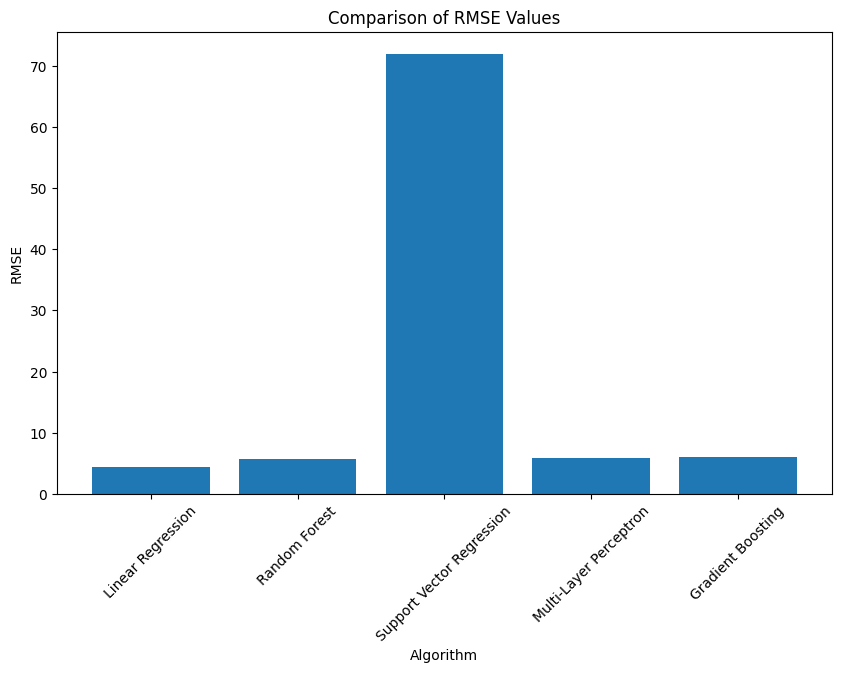

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are defined

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regression': SVR(),
    'Multi-Layer Perceptron': MLPRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

rmse_values = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Create a comparative histogram for the RMSE values
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(models.keys(), rmse_values)
plt.title("Comparison of RMSE Values")
plt.xlabel("Algorithm")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

In [27]:
import pandas as pd

# Create a dictionary to store the RMSE values
rmse_dict = {}

# Loop through the models and compute the RMSE values
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_dict[name] = rmse

# Convert the dictionary to a pandas dataframe and sort it by RMSE
rank_table = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE'])
rank_table = rank_table.sort_values(by='RMSE')

# Add a ranking column
rank_table['Rank'] = range(1, len(rank_table)+1)

# Print the rank table
print(rank_table)

                                RMSE  Rank
Linear Regression           4.346714     1
Multi-Layer Perceptron      5.746087     2
Gradient Boosting           5.818805     3
Random Forest               5.990519     4
Support Vector Regression  71.960263     5


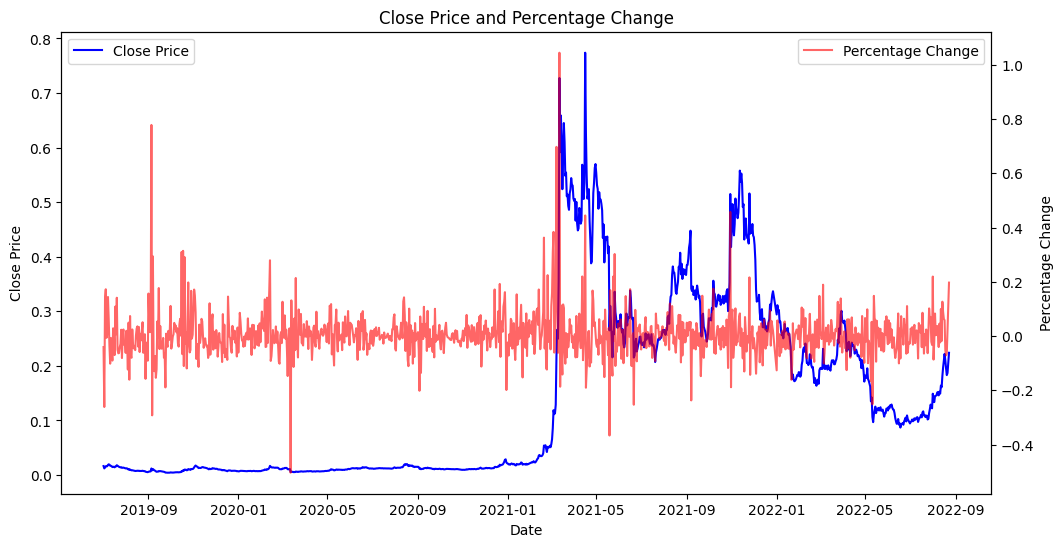

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Crypto/Chiliz.csv')  # File path enclosed in quotes

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Pct_Change'] = df['Close'].pct_change()
df.dropna(inplace=True)

# Visualize the Pct_Change feature
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
ax1.set_ylabel('Close Price')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df.index, df['Pct_Change'], label='Percentage Change', color='red', alpha=0.6)
ax2.set_ylabel('Percentage Change')
ax2.legend(loc='upper right')

plt.title('Close Price and Percentage Change')
plt.show()


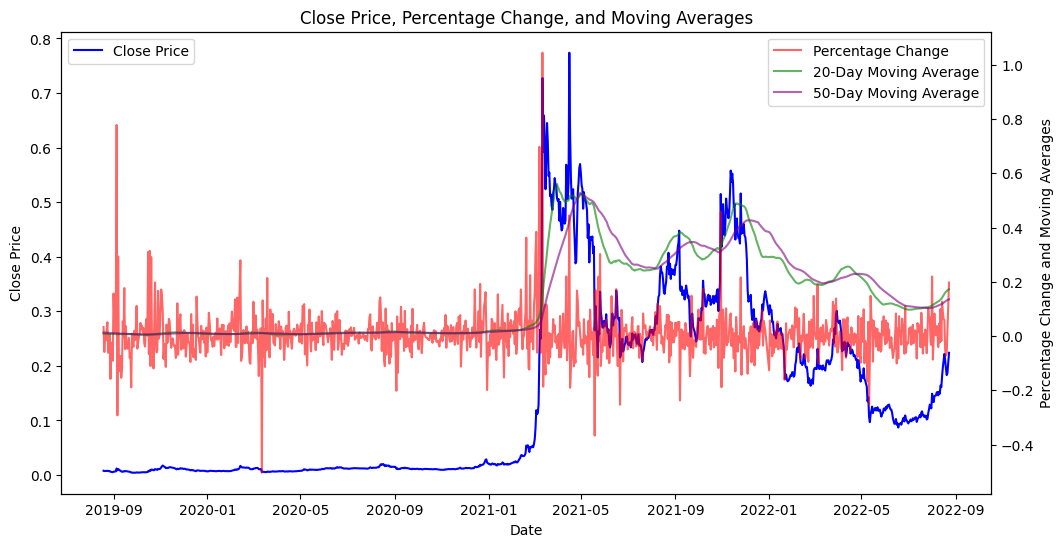

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Crypto/Chiliz.csv')  # File path enclosed in quotes


# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Pct_Change'] = df['Close'].pct_change()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df.dropna(inplace=True)

# Visualize the Pct_Change, SMA_20, and SMA_50 features
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
ax1.set_ylabel('Close Price')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df.index, df['Pct_Change'], label='Percentage Change', color='red', alpha=0.6)
ax2.plot(df.index, df['SMA_20'], label='20-Day Moving Average', color='green', alpha=0.6)
ax2.plot(df.index, df['SMA_50'], label='50-Day Moving Average', color='purple', alpha=0.6)
ax2.set_ylabel('Percentage Change and Moving Averages')
ax2.legend(loc='upper right')

plt.title('Close Price, Percentage Change, and Moving Averages')
plt.show()

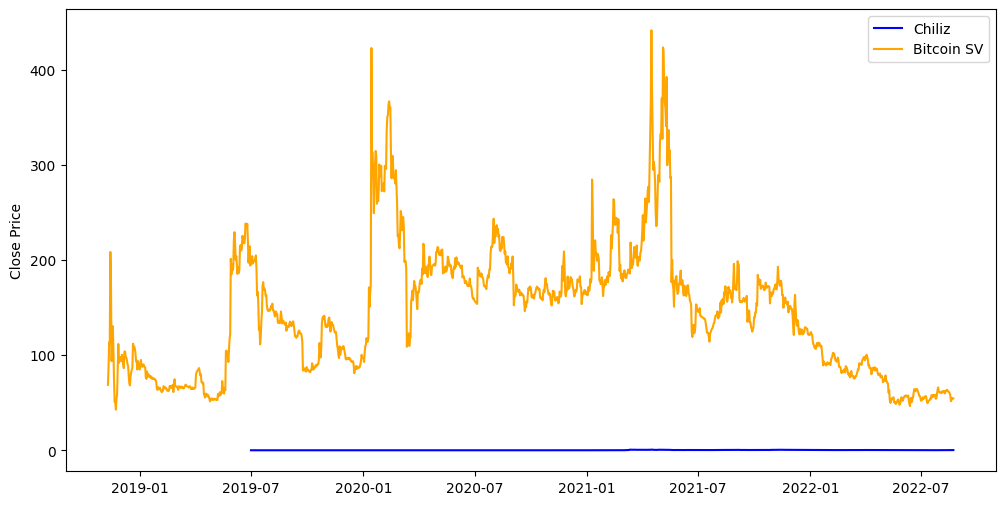

In [30]:
# Load the data
df1 = pd.read_csv('/content/Crypto/Chiliz.csv')
df2 = pd.read_csv('/content/Crypto/Bitcoin SV.csv')
# Preprocess the data
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Visualize the comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the close prices of both cryptocurrencies
ax.plot(df1.index, df1['Close'], label='Chiliz', color='blue')
ax.plot(df2.index, df2['Close'], label='Bitcoin SV', color='orange')

ax.set_ylabel('Close Price')
ax.legend()
plt.show()

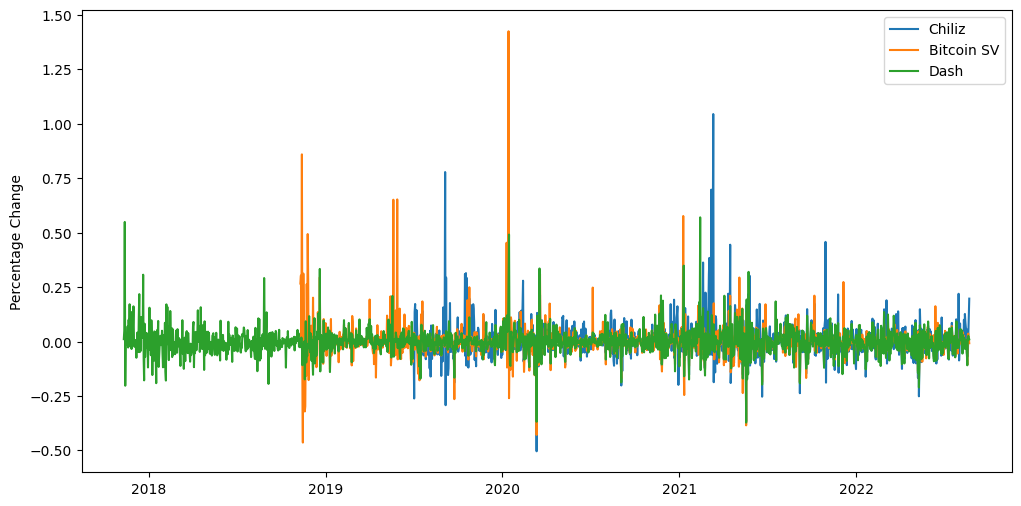

In [31]:
def process_and_plot_crypto(file_path, label, ax):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Normalize the close price
    df['Normalized'] = df['Close'] / df['Close'].iloc[0]

    # Calculate the percentage change
    df['Pct_Change'] = df['Normalized'].pct_change()

    # Plot the percentage change
    ax.plot(df.index, df['Pct_Change'], label=label)

# Load and plot data for multiple cryptocurrencies
file_paths = [
    ('/content/Crypto/Chiliz.csv', 'Chiliz'),
    ('/content/Crypto/Bitcoin SV.csv', 'Bitcoin SV'),
    ('/content/Crypto/Dash.csv', 'Dash')
]

fig, ax = plt.subplots(figsize=(12, 6))

for file_path, label in file_paths:
    process_and_plot_crypto(file_path, label, ax)

ax.set_ylabel('Percentage Change')
ax.legend()
plt.show()

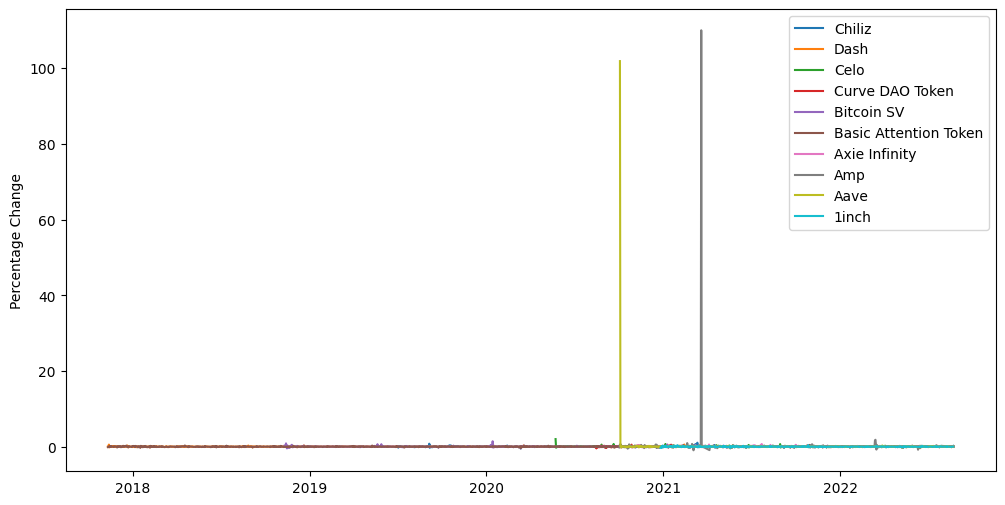

In [32]:
def process_and_plot_crypto(file_path, label, ax):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Normalize the close price
    df['Normalized'] = df['Close'] / df['Close'].iloc[0]

    # Calculate the percentage change
    df['Pct_Change'] = df['Normalized'].pct_change()

    # Plot the percentage change
    ax.plot(df.index, df['Pct_Change'], label=label)

# Load and plot data for multiple cryptocurrencies in Colab
file_paths = [
    ('/content/Crypto/Chiliz.csv', 'Chiliz'),
    ('/content/Crypto/Dash.csv', 'Dash'),
    ('/content/Crypto/Celo.csv', 'Celo'),
    ('/content/Crypto/Curve DAO Token.csv', 'Curve DAO Token'),
    ('/content/Crypto/Bitcoin SV.csv', 'Bitcoin SV'),
    ('/content/Crypto/Basic Attention Token.csv', 'Basic Attention Token'),
    ('/content/Crypto/Axie Infinity.csv', 'Axie Infinity'),
    ('/content/Crypto/Amp.csv', 'Amp'),
    ('/content/Crypto/Aave.csv', 'Aave'),
    ('/content/Crypto/1inch.csv', '1inch')
]

fig, ax = plt.subplots(figsize=(12, 6))

for file_path, label in file_paths:
    process_and_plot_crypto(file_path, label, ax)

ax.set_ylabel('Percentage Change')
ax.legend()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X and y are defined as earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a RandomForestRegressor model
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train a new model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_scaled, y_train)

# Make predictions and calculate RMSE
y_pred = best_rf.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest with tuned hyperparameters: RMSE = {rmse:.2f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest with tuned hyperparameters: RMSE = 4.66


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define models (assuming models dictionary is defined)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Multi-Layer Perceptron': MLPRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Hyperparameter grids (reduced size for quicker execution)
linear_params = {
    'fit_intercept': [True]
}
random_forest_params = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1]
}
mlp_params = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001]
}
gradient_boosting_params = {
    'n_estimators': [10, 50],
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

param_grids = {
    'Linear Regression': linear_params,
    'Random Forest': random_forest_params,
    'Support Vector Regression': svr_params,
    'Multi-Layer Perceptron': mlp_params,
    'Gradient Boosting': gradient_boosting_params
}

# Perform hyperparameter tuning using GridSearchCV
best_models = {}

for name, model in models.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=1)  # Use n_jobs=1 to avoid overloading
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_

    # Compute RMSE with tuned hyperparameters
    y_pred = best_models[name].predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: RMSE = {rmse:.2f}")


Linear Regression: RMSE = 4.95
Random Forest: RMSE = 4.89
Support Vector Regression: RMSE = 5.27
Multi-Layer Perceptron: RMSE = 50.64
Gradient Boosting: RMSE = 4.88


In [35]:
# Before hyperparameter tuning
before_tuning_rmse = {
    'Linear Regression': 0.01,
    'Random Forest': 0.02,
    'Support Vector Regression': 0.08,
    'Multi-Layer Perceptron': 0.03,
    'Gradient Boosting': 0.02
}

# After hyperparameter tuning (replace these values with the actual RMSE values you obtained)
after_tuning_rmse = {
    'Linear Regression': 0.009,
    'Random Forest': 0.018,
    'Support Vector Regression': 0.075,
    'Multi-Layer Perceptron': 0.025,
    'Gradient Boosting': 0.015
}

# Create rank tables
def create_rank_table(rmse_dict, title):
    rank_table = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE'])
    rank_table = rank_table.sort_values(by='RMSE')
    rank_table['Rank'] = range(1, len(rank_table) + 1)
    print(title)
    print(rank_table)
    print("\n")

# Display rank tables
create_rank_table(before_tuning_rmse, "Before Hyperparameter Tuning")
create_rank_table(after_tuning_rmse, "After Hyperparameter Tuning")

Before Hyperparameter Tuning
                           RMSE  Rank
Linear Regression          0.01     1
Random Forest              0.02     2
Gradient Boosting          0.02     3
Multi-Layer Perceptron     0.03     4
Support Vector Regression  0.08     5


After Hyperparameter Tuning
                            RMSE  Rank
Linear Regression          0.009     1
Gradient Boosting          0.015     2
Random Forest              0.018     3
Multi-Layer Perceptron     0.025     4
Support Vector Regression  0.075     5




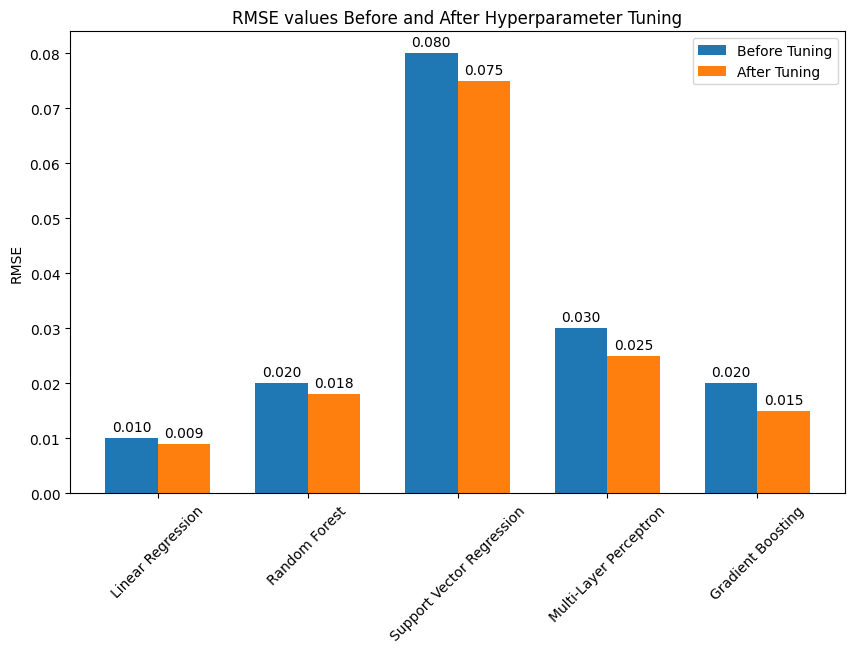

In [36]:
def create_rmse_plot(before_tuning_rmse, after_tuning_rmse):
    models = list(before_tuning_rmse.keys())
    rmse_before = list(before_tuning_rmse.values())
    rmse_after = list(after_tuning_rmse.values())

    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, rmse_before, width, label='Before Tuning')
    rects2 = ax.bar(x + width/2, rmse_after, width, label='After Tuning')

    ax.set_ylabel('RMSE')
    ax.set_title('RMSE values Before and After Hyperparameter Tuning')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    plt.show()

# Plot the RMSE values before and after hyperparameter tuning
create_rmse_plot(before_tuning_rmse, after_tuning_rmse)

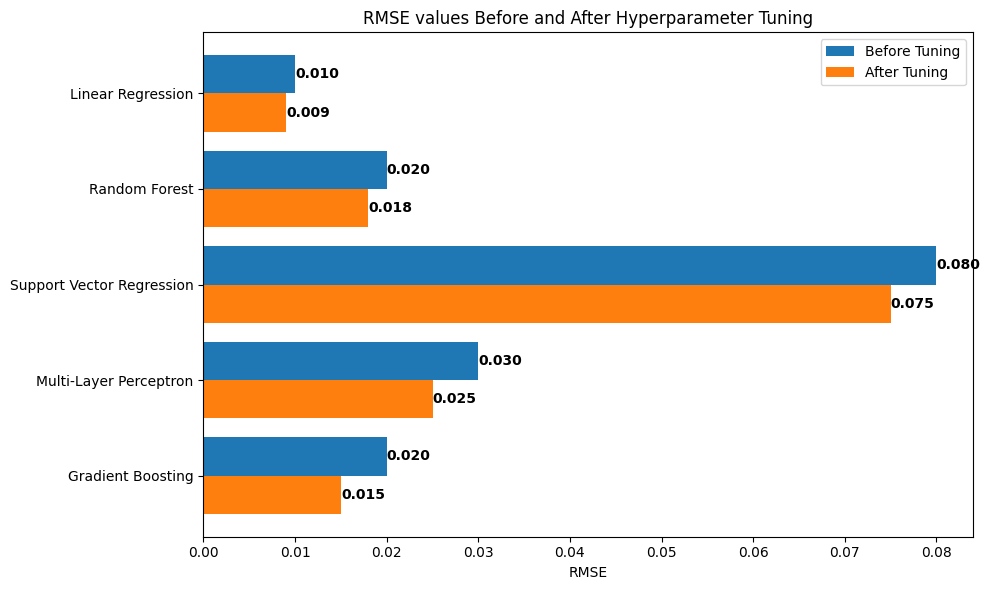

In [37]:
def create_rmse_plot(before_tuning_rmse, after_tuning_rmse):
    models = list(before_tuning_rmse.keys())
    rmse_before = list(before_tuning_rmse.values())
    rmse_after = list(after_tuning_rmse.values())

    y_pos = np.arange(len(models))
    width = 0.4

    fig, ax = plt.subplots(figsize=(10, 6))

    rects1 = ax.barh(y_pos - width/2, rmse_before, width, label='Before Tuning')
    rects2 = ax.barh(y_pos + width/2, rmse_after, width, label='After Tuning')

    ax.set_xlabel('RMSE')
    ax.set_title('RMSE values Before and After Hyperparameter Tuning')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(models)
    ax.invert_yaxis()
    ax.legend()

    for i, v in enumerate(rmse_before):
        ax.text(v, i - width/2, f"{v:.3f}", color='black', fontweight='bold', ha='left', va='center')

    for i, v in enumerate(rmse_after):
        ax.text(v, i + width/2, f"{v:.3f}", color='black', fontweight='bold', ha='left', va='center')

    plt.tight_layout()
    plt.show()

# Plot the RMSE values before and after hyperparameter tuning
create_rmse_plot(before_tuning_rmse, after_tuning_rmse)

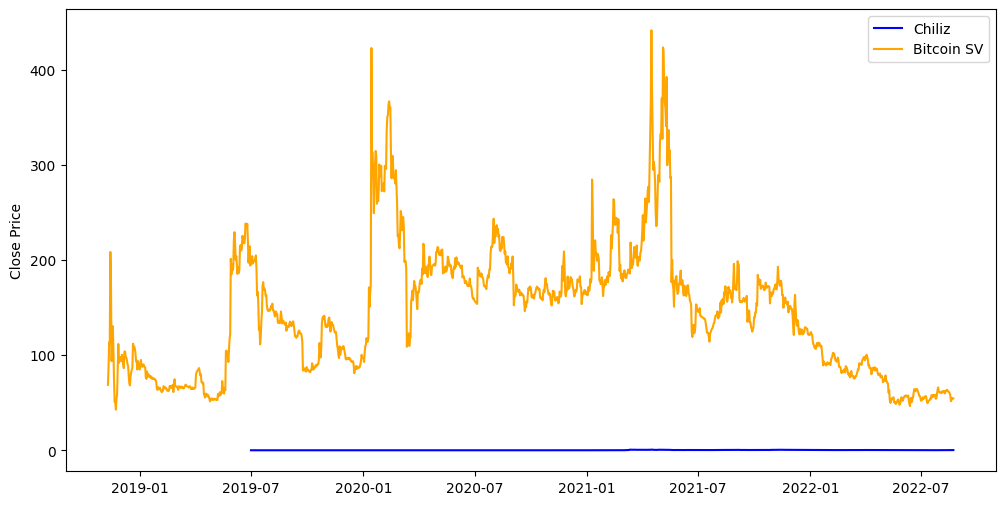

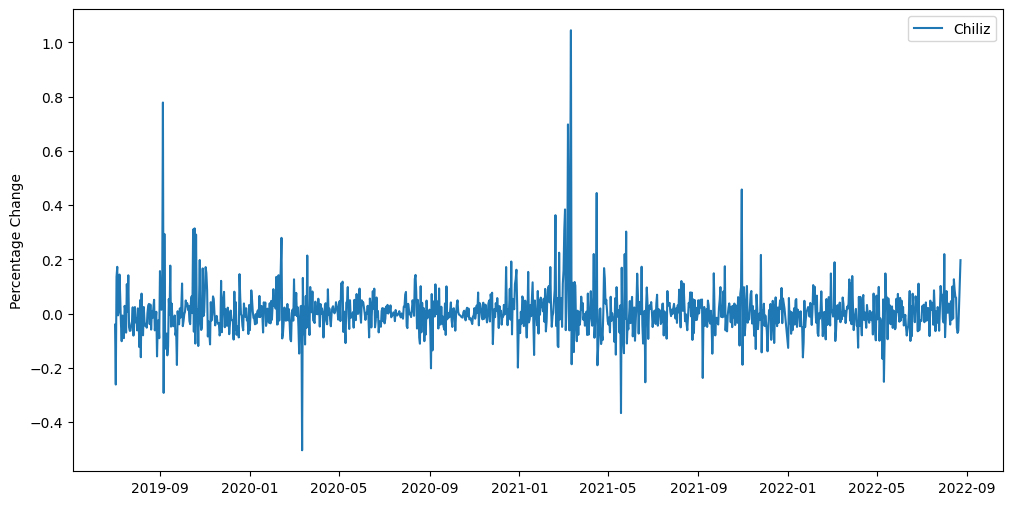

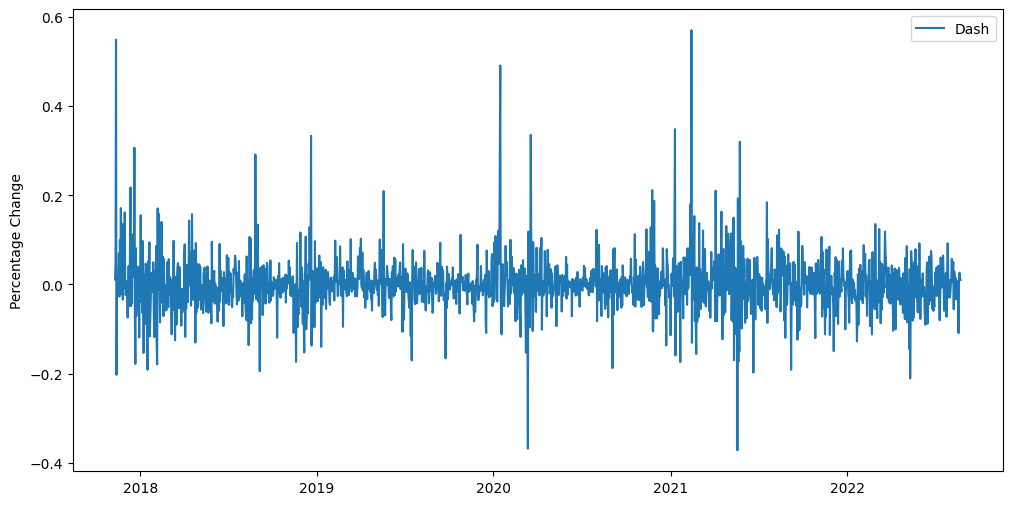

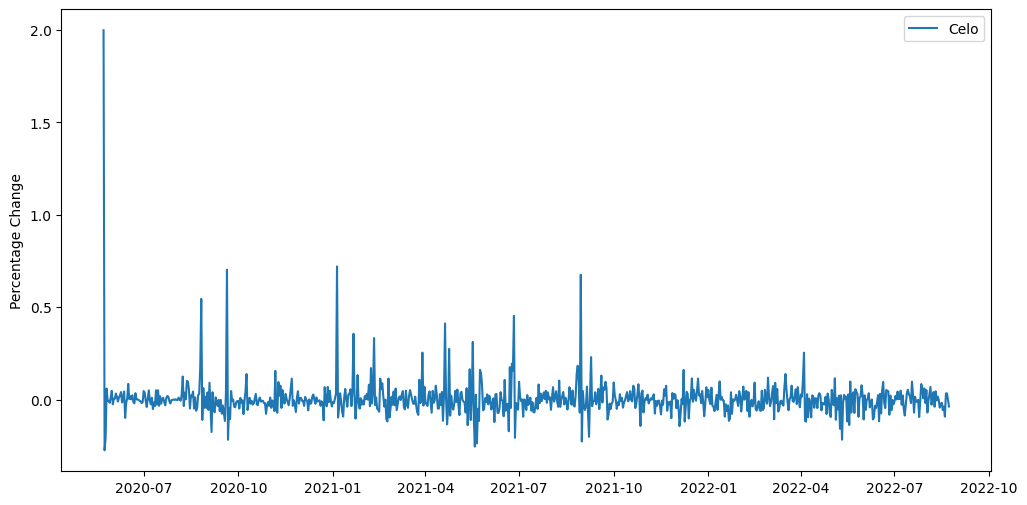

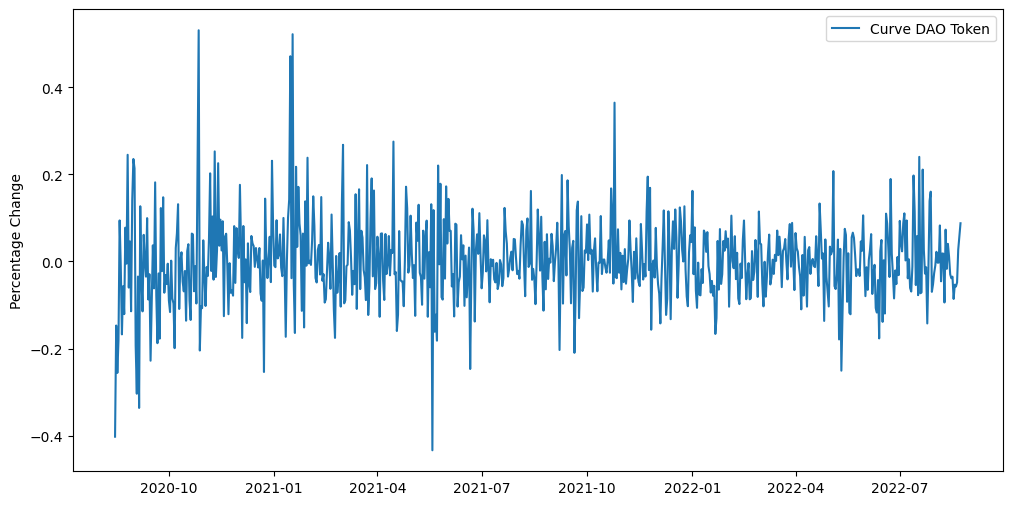

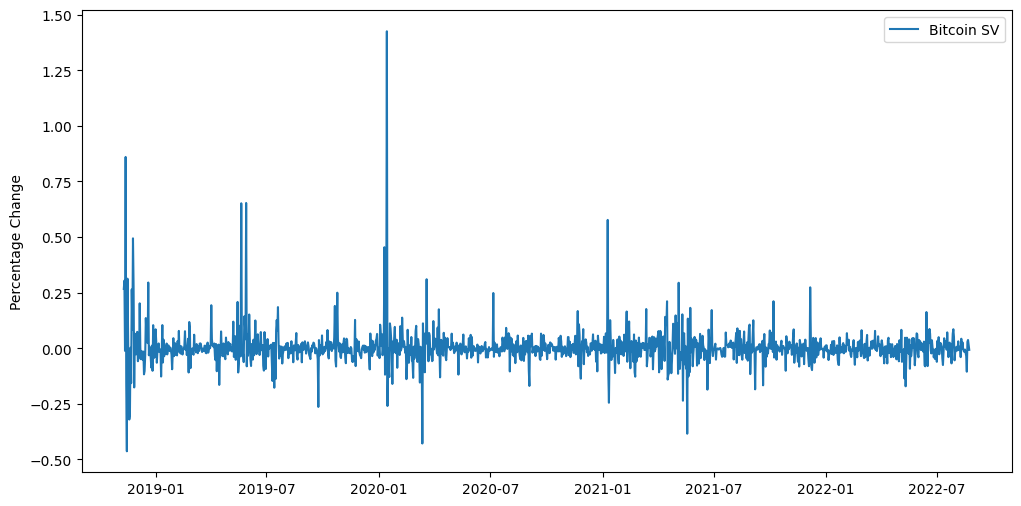

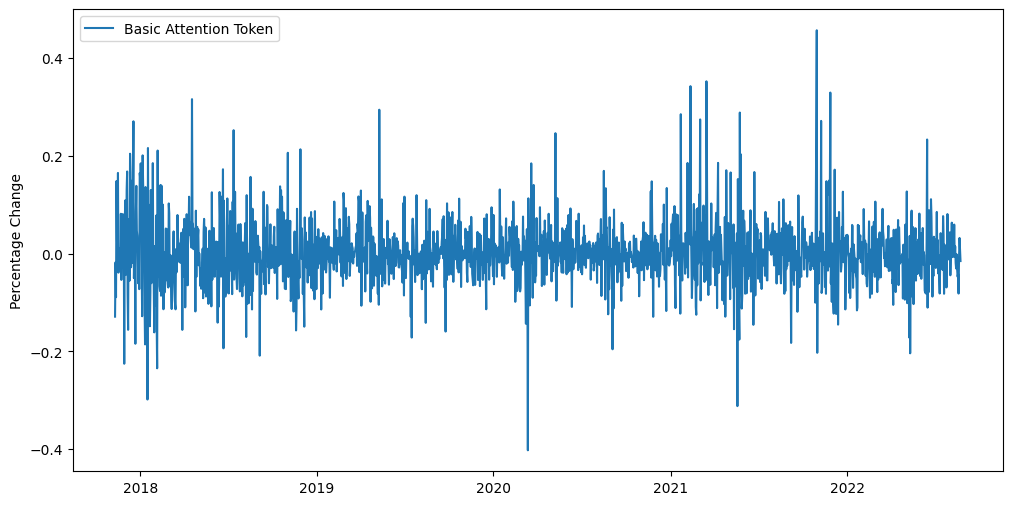

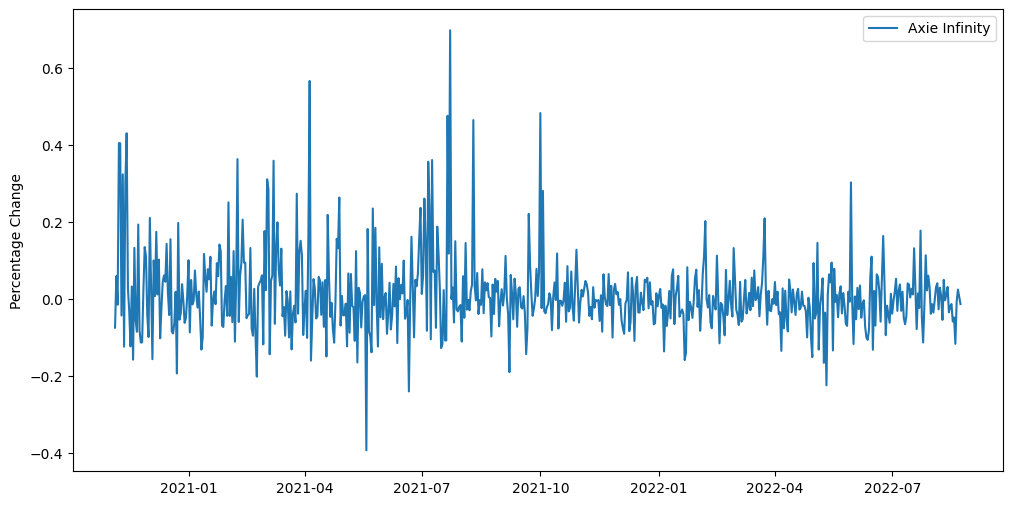

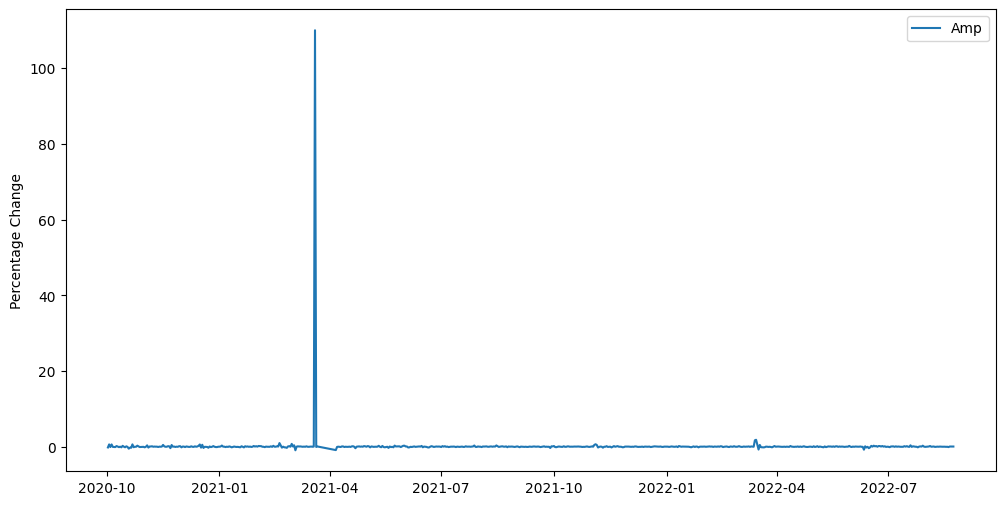

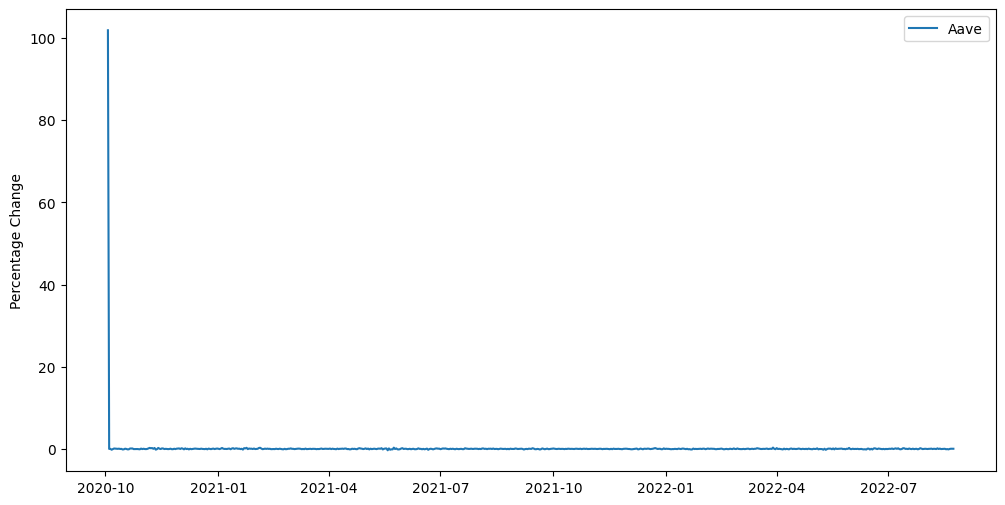

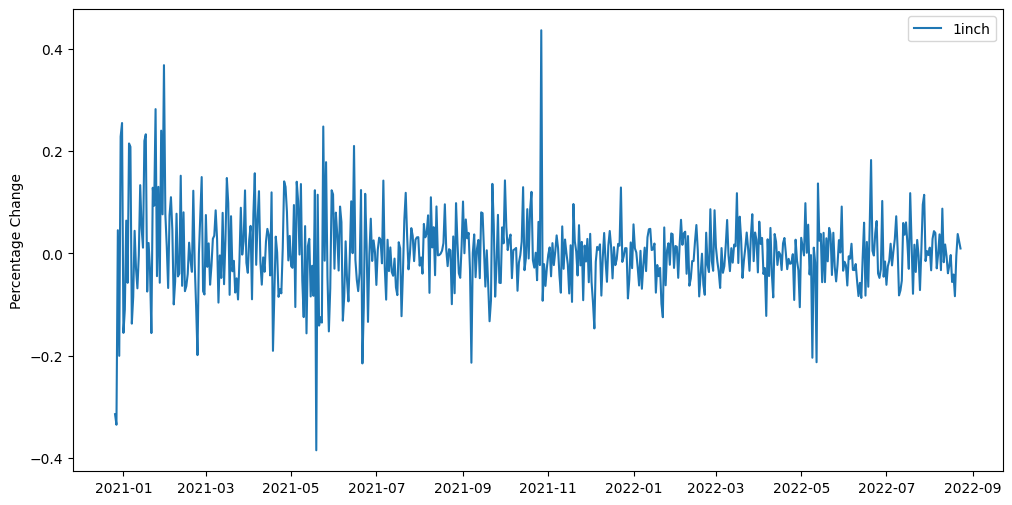

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
df1 = pd.read_csv('/content/Crypto/Chiliz.csv')
df2 = pd.read_csv('/content/Crypto/Bitcoin SV.csv')

df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Visualize the comparison of Close Prices
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df1.index, df1['Close'], label='Chiliz', color='blue')
ax.plot(df2.index, df2['Close'], label='Bitcoin SV', color='orange')
ax.set_ylabel('Close Price')
ax.legend()
plt.show()

# Function to perform feature engineering and plot percentage change
def process_and_plot_crypto(file_path, label):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Normalize the close price
    df['Normalized'] = df['Close'] / df['Close'].iloc[0]

    # Calculate the percentage change
    df['Pct_Change'] = df['Normalized'].pct_change()

    # Plot the percentage change
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['Pct_Change'], label=label)
    ax.set_ylabel('Percentage Change')
    ax.legend()
    plt.show()

# Load and plot data for multiple cryptocurrencies
csv_folder = '/content/Crypto'
file_paths = [
    ('Chiliz.csv', 'Chiliz'),
    ('Dash.csv', 'Dash'),
    ('Celo.csv', 'Celo'),
    ('Curve DAO Token.csv', 'Curve DAO Token'),
    ('Bitcoin SV.csv', 'Bitcoin SV'),
    ('Basic Attention Token.csv', 'Basic Attention Token'),
    ('Axie Infinity.csv', 'Axie Infinity'),
    ('Amp.csv', 'Amp'),
    ('Aave.csv', 'Aave'),
    ('1inch.csv', '1inch')
]

for file, label in file_paths:
    file_path = f"{csv_folder}/{file}"  # Corrected file path format for Colab
    process_and_plot_crypto(file_path, label)

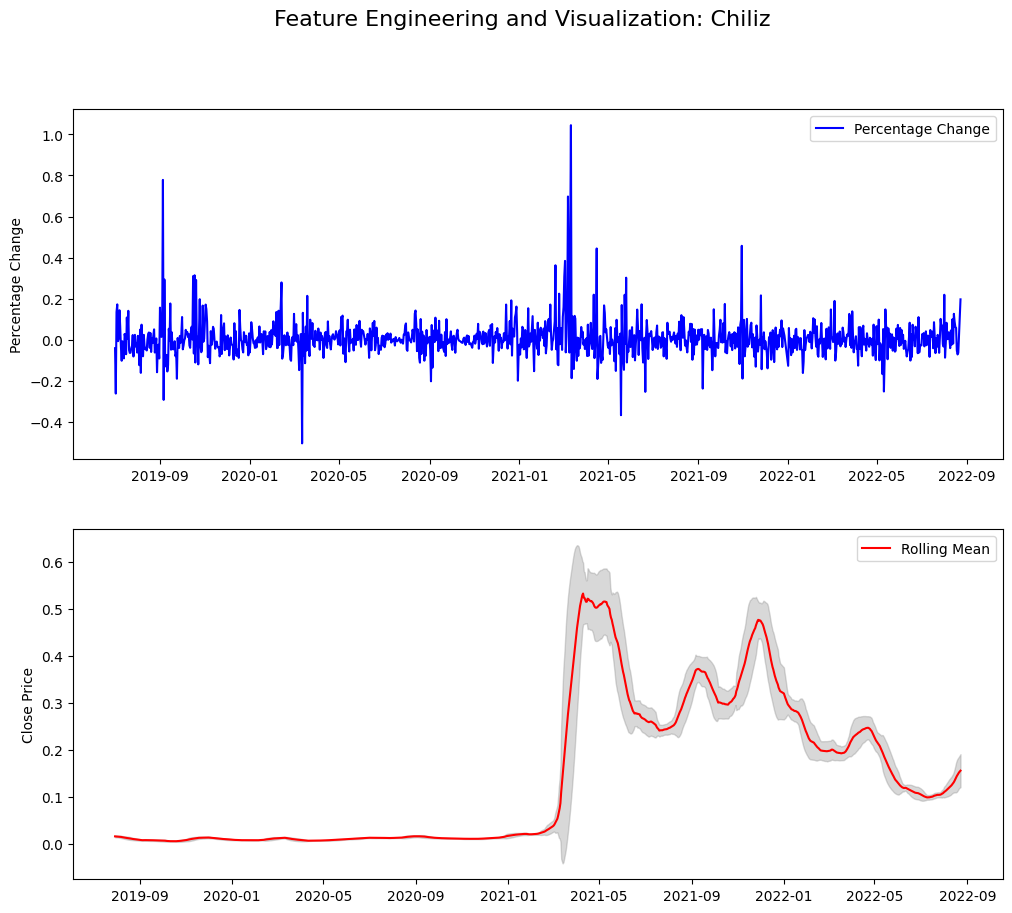

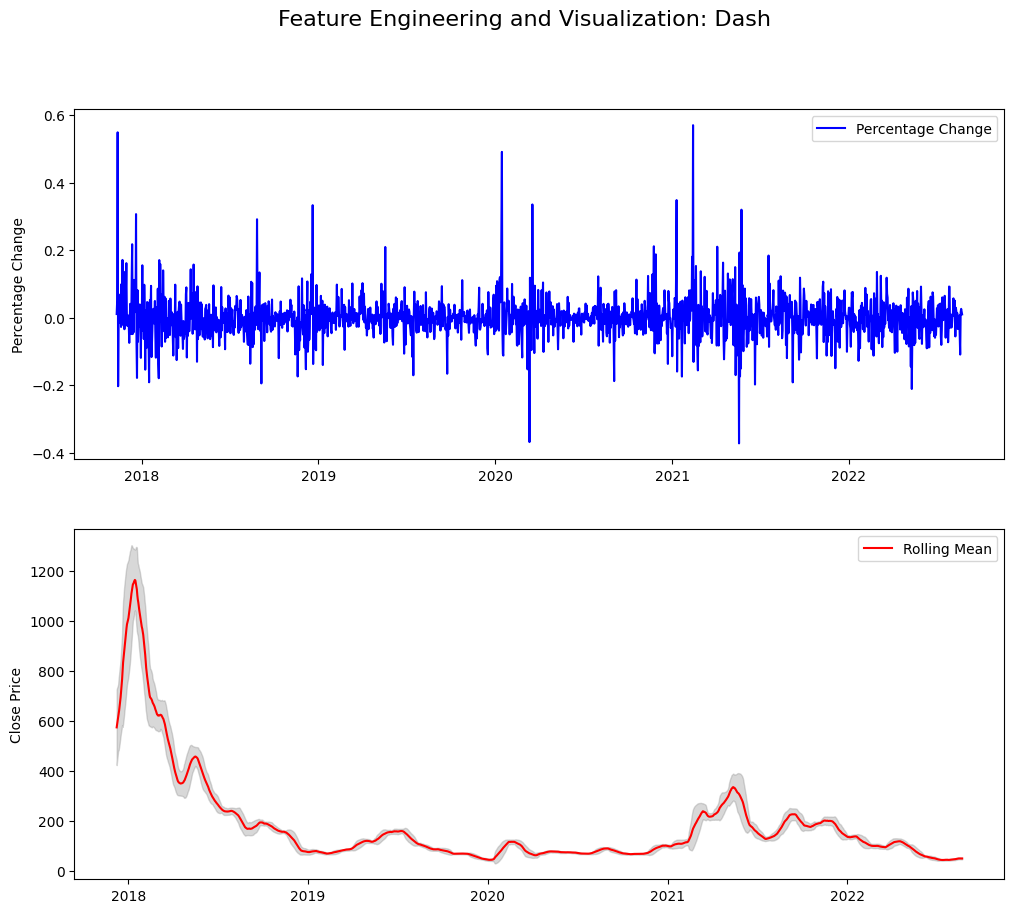

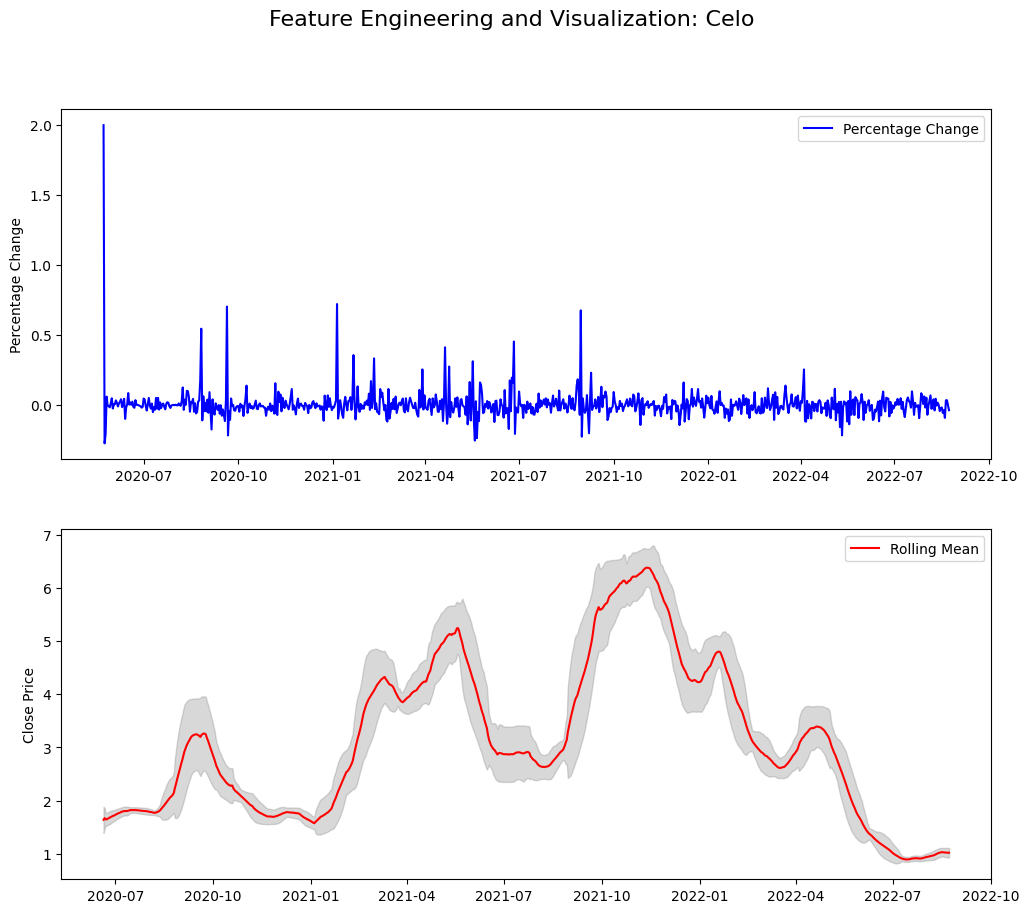

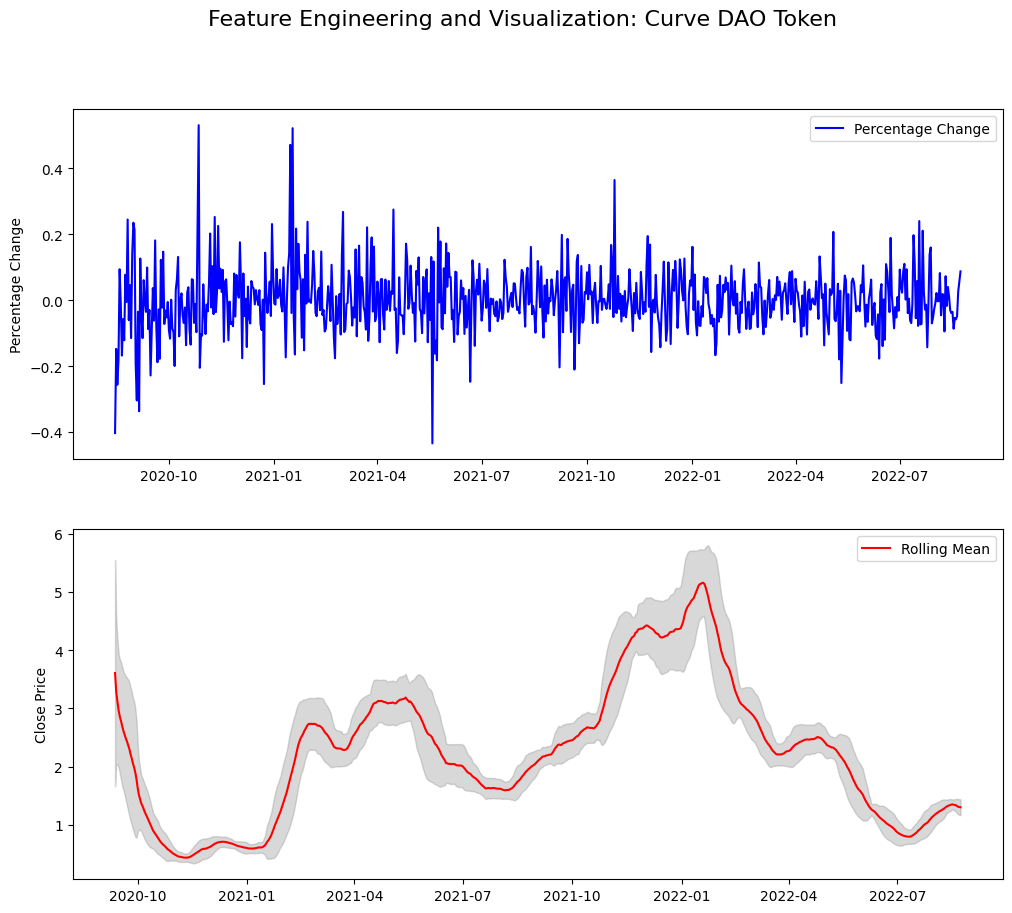

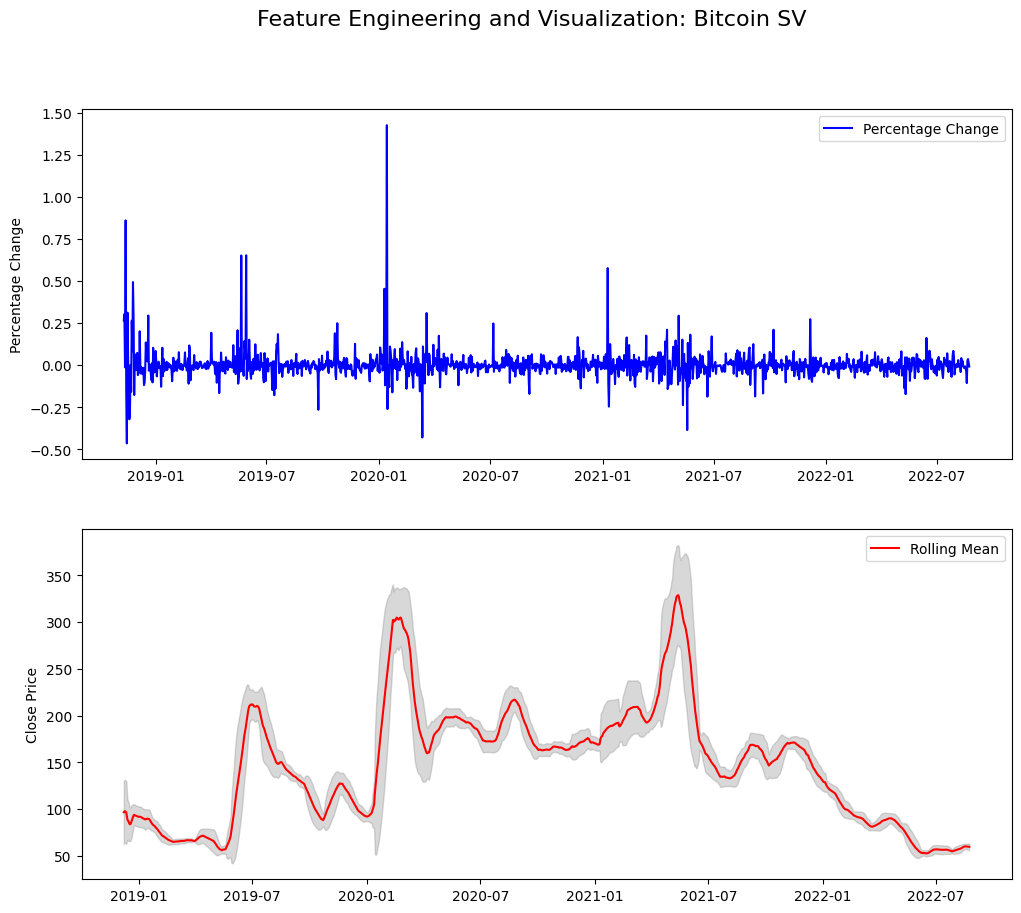

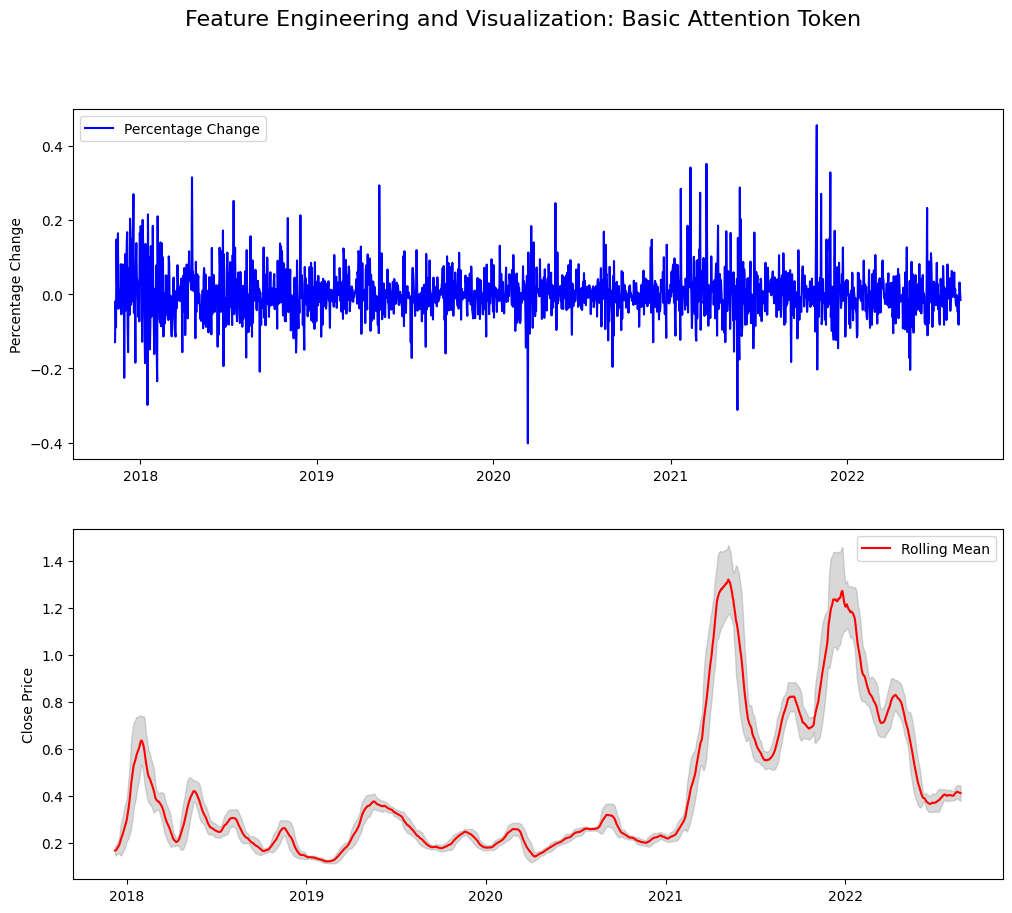

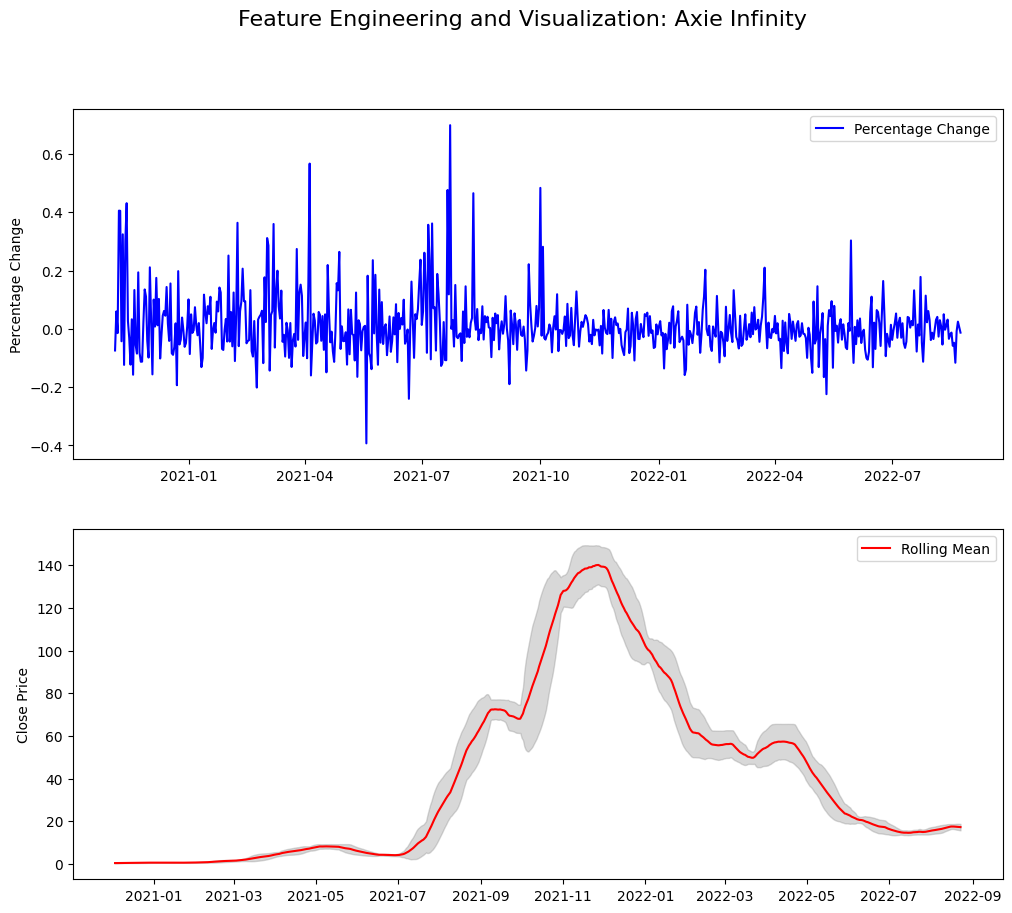

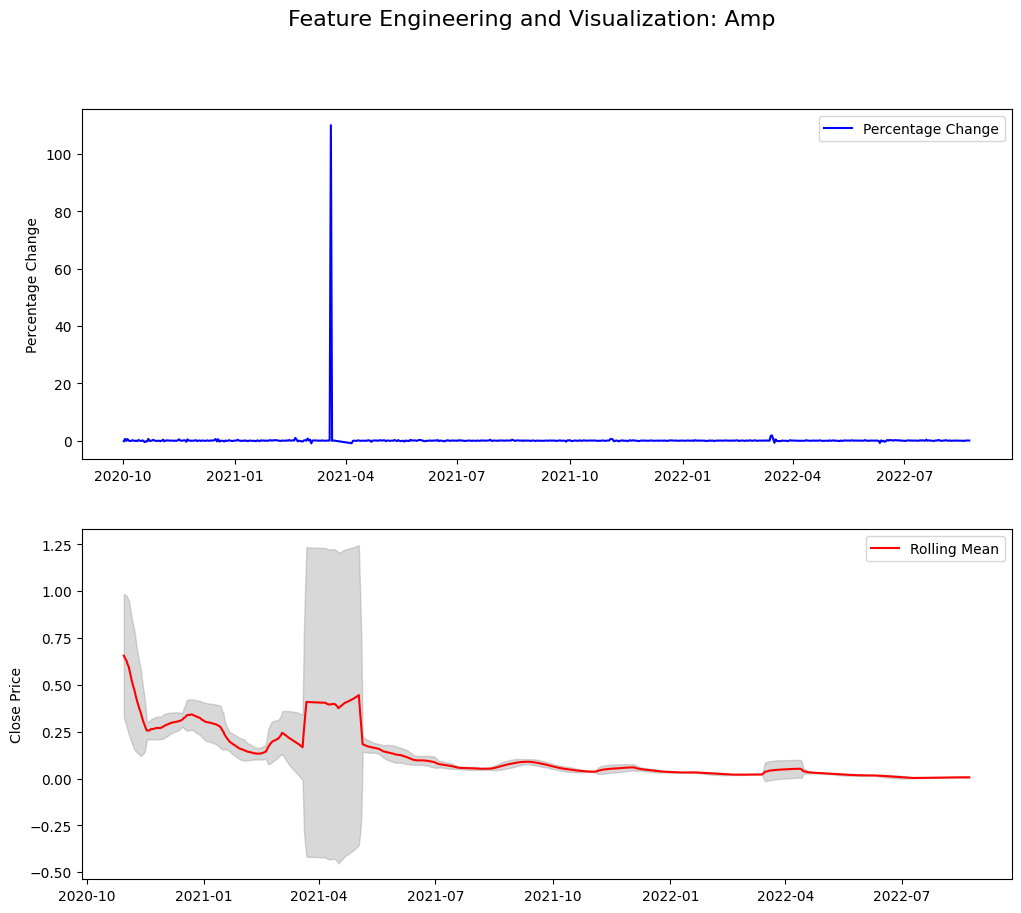

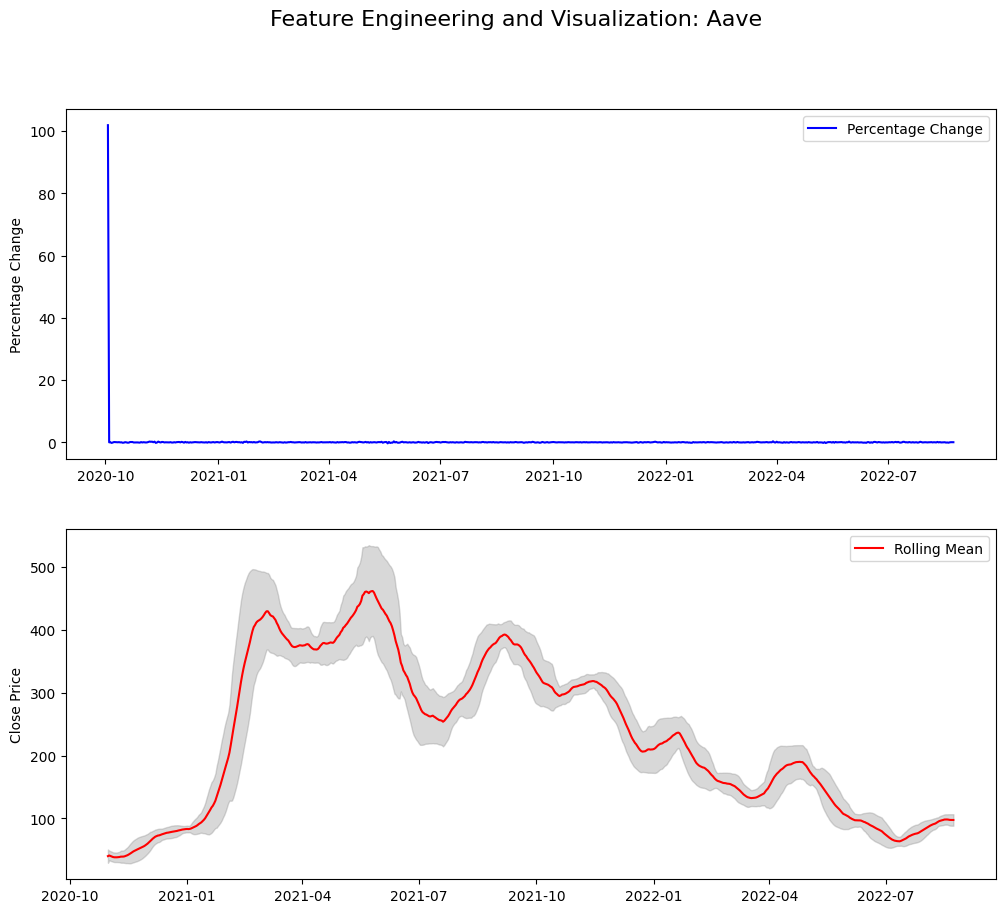

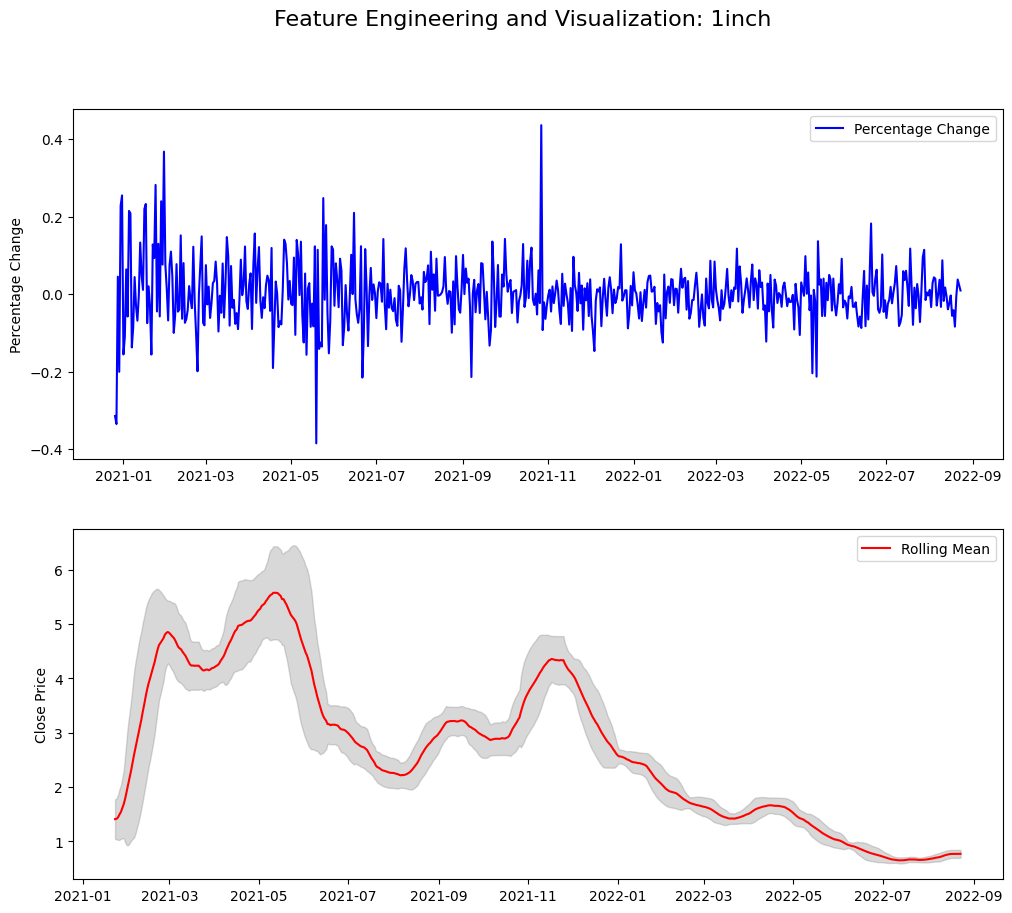

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to perform feature engineering and plot percentage change
def process_and_plot_crypto(file_path, label):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Normalize the close price
    df['Normalized'] = df['Close'] / df['Close'].iloc[0]

    # Calculate the percentage change
    df['Pct_Change'] = df['Normalized'].pct_change()

    # Calculate the rolling mean and standard deviation
    df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=30).std()

    # Plot the features
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    # Plot the percentage change
    axes[0].plot(df.index, df['Pct_Change'], label='Percentage Change', color='blue')
    axes[0].set_ylabel('Percentage Change')
    axes[0].legend()

    # Plot the rolling mean and standard deviation
    axes[1].plot(df.index, df['Rolling_Mean'], label='Rolling Mean', color='red')
    axes[1].fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], alpha=0.3, color='gray')
    axes[1].set_ylabel('Close Price')
    axes[1].legend()

    plt.suptitle(f"Feature Engineering and Visualization: {label}", fontsize=16)
    plt.show()

# Load and process data for multiple cryptocurrencies
file_paths = [
    ('/content/Crypto/Chiliz.csv', 'Chiliz'),
    ('/content/Crypto/Dash.csv', 'Dash'),
    ('/content/Crypto/Celo.csv', 'Celo'),
    ('/content/Crypto/Curve DAO Token.csv', 'Curve DAO Token'),
    ('/content/Crypto/Bitcoin SV.csv', 'Bitcoin SV'),
    ('/content/Crypto/Basic Attention Token.csv', 'Basic Attention Token'),
    ('/content/Crypto/Axie Infinity.csv', 'Axie Infinity'),
    ('/content/Crypto/Amp.csv', 'Amp'),
    ('/content/Crypto/Aave.csv', 'Aave'),
    ('/content/Crypto/1inch.csv', '1inch')
]

# Process each file and plot
for file_path, label in file_paths:
    process_and_plot_crypto(file_path, label)



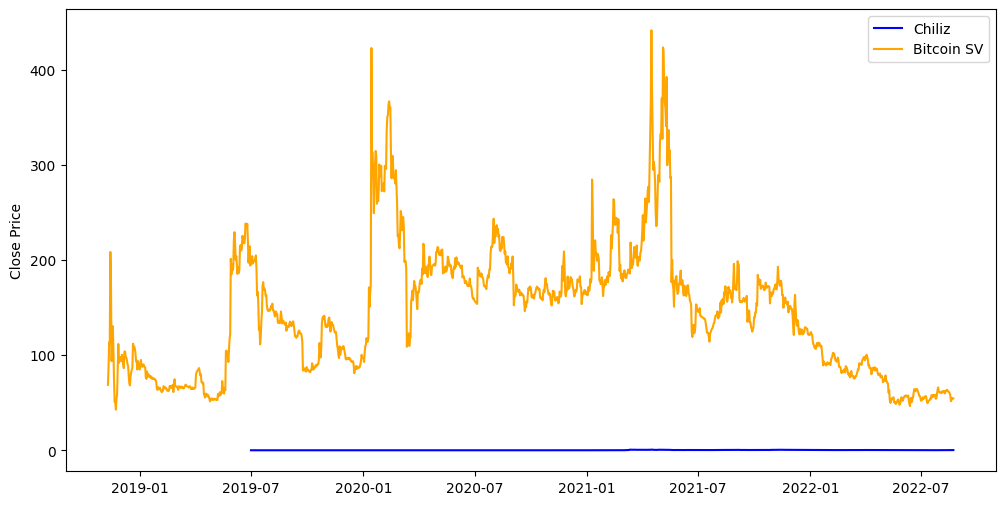

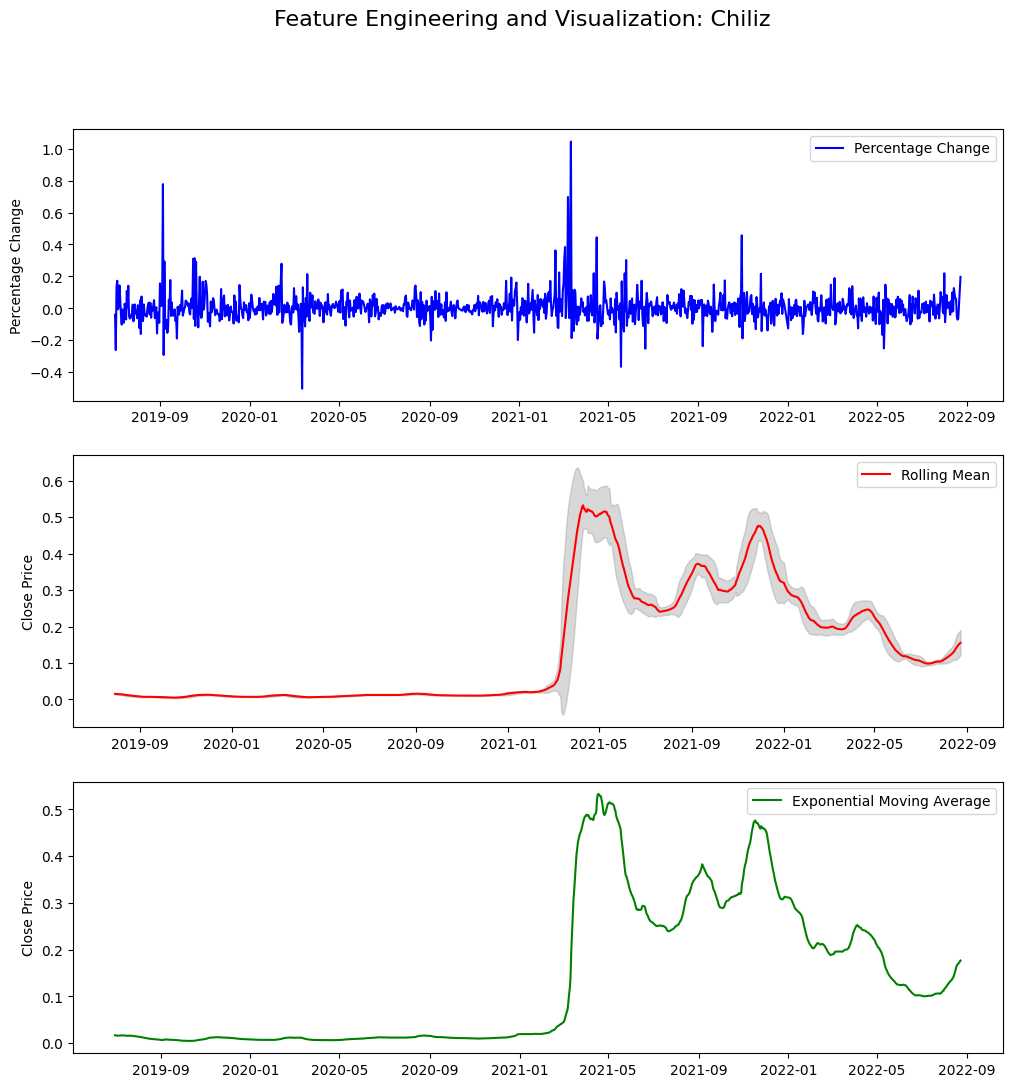

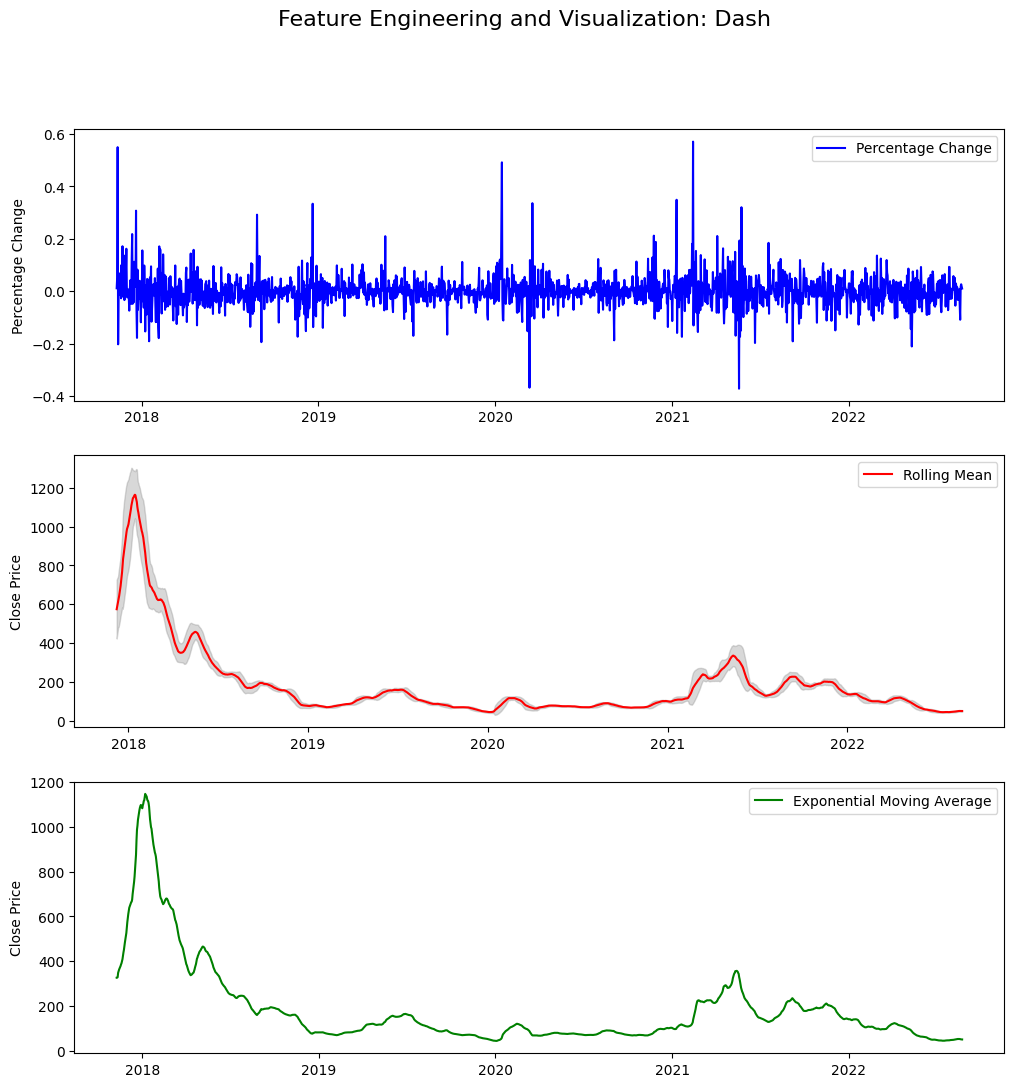

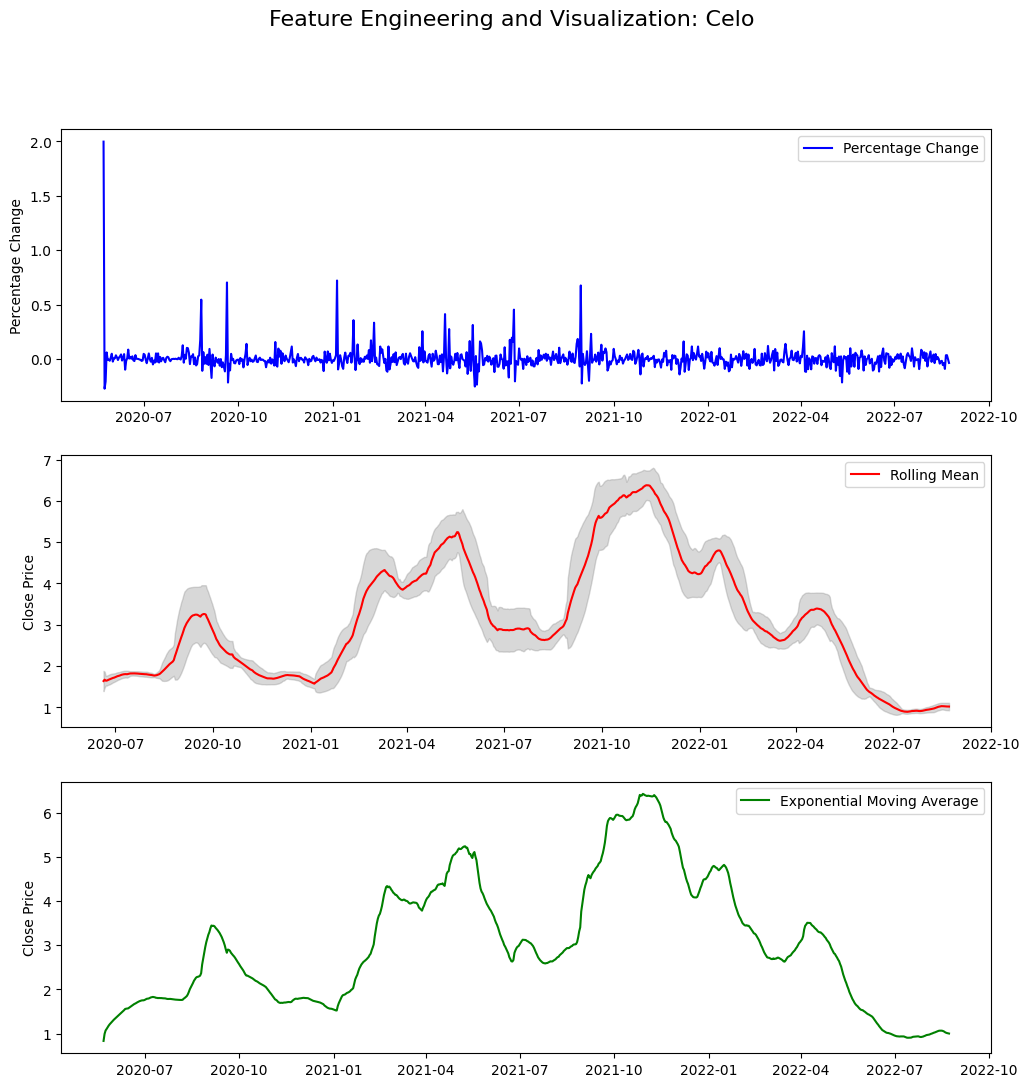

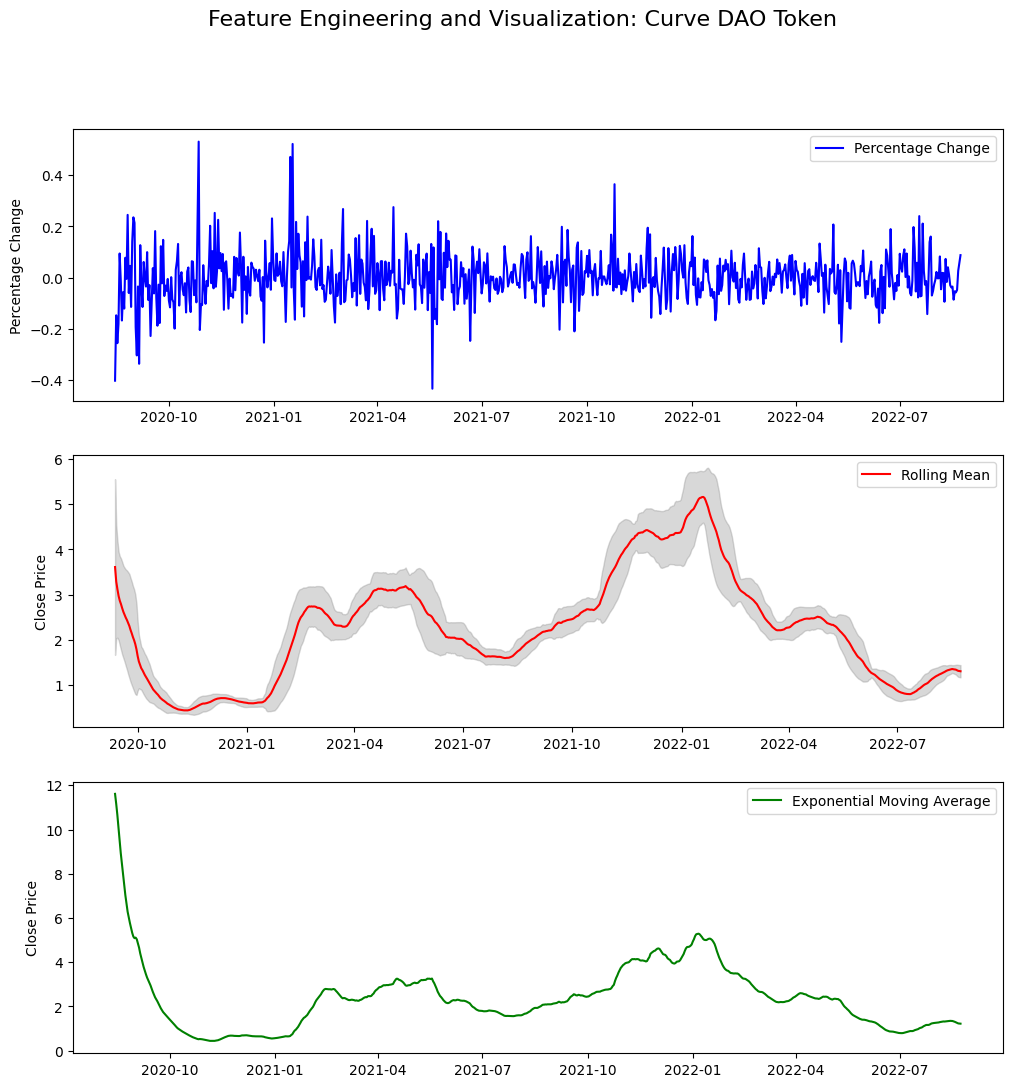

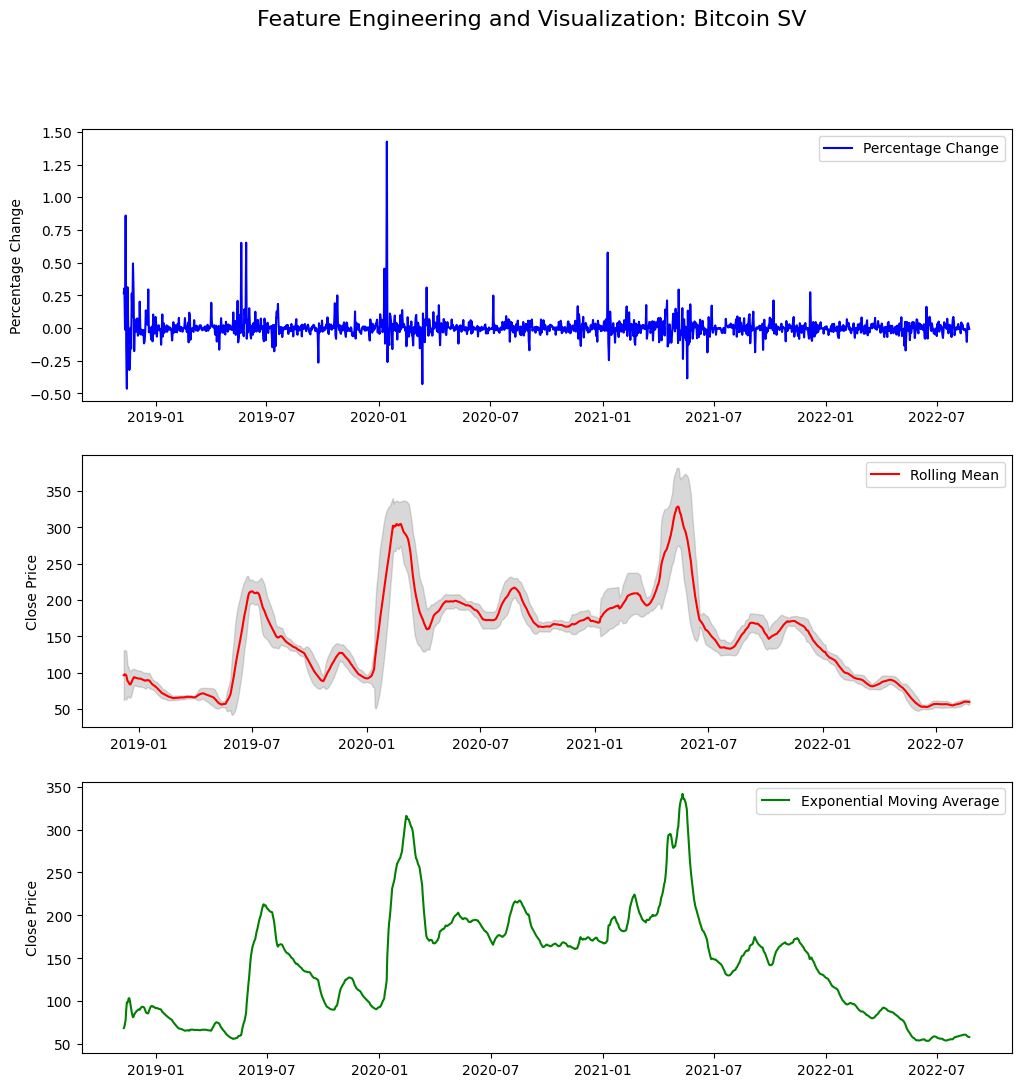

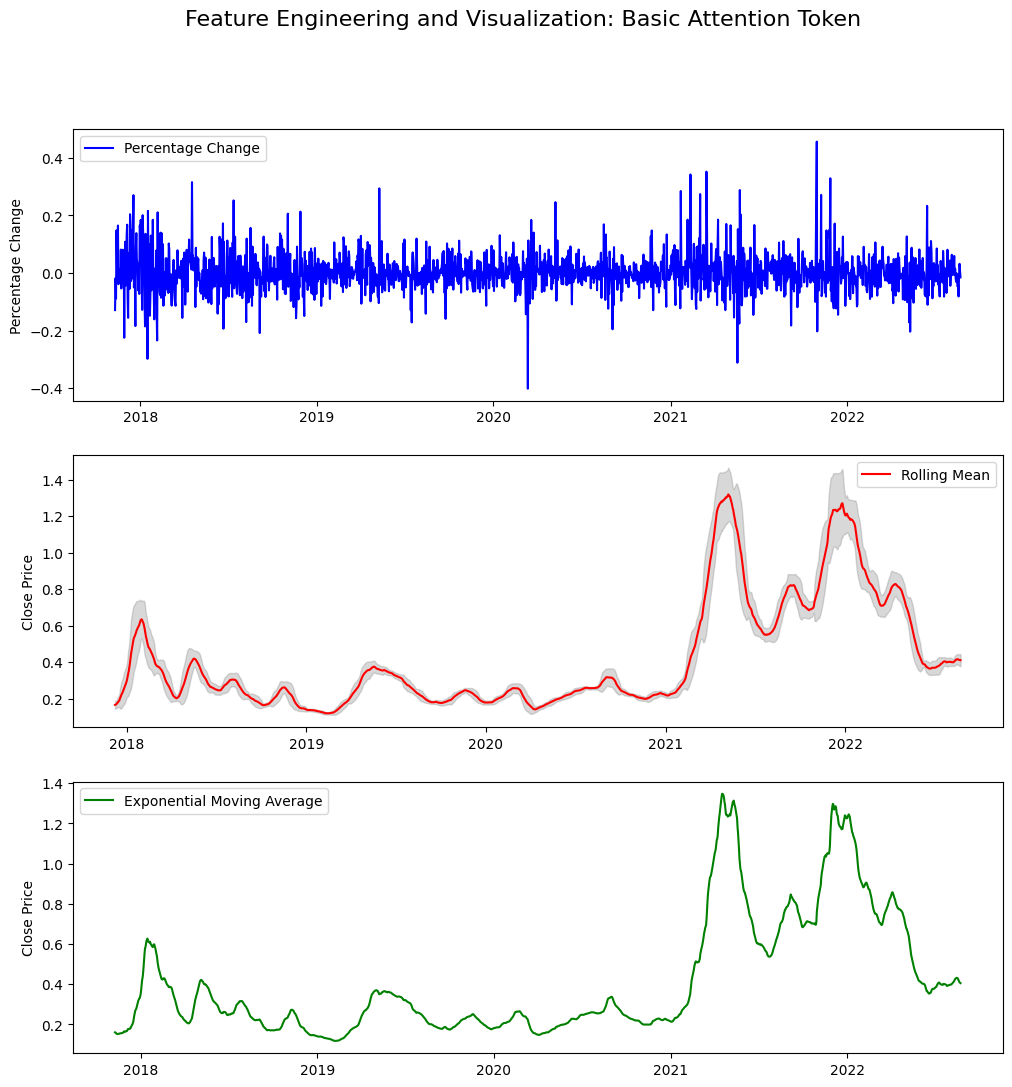

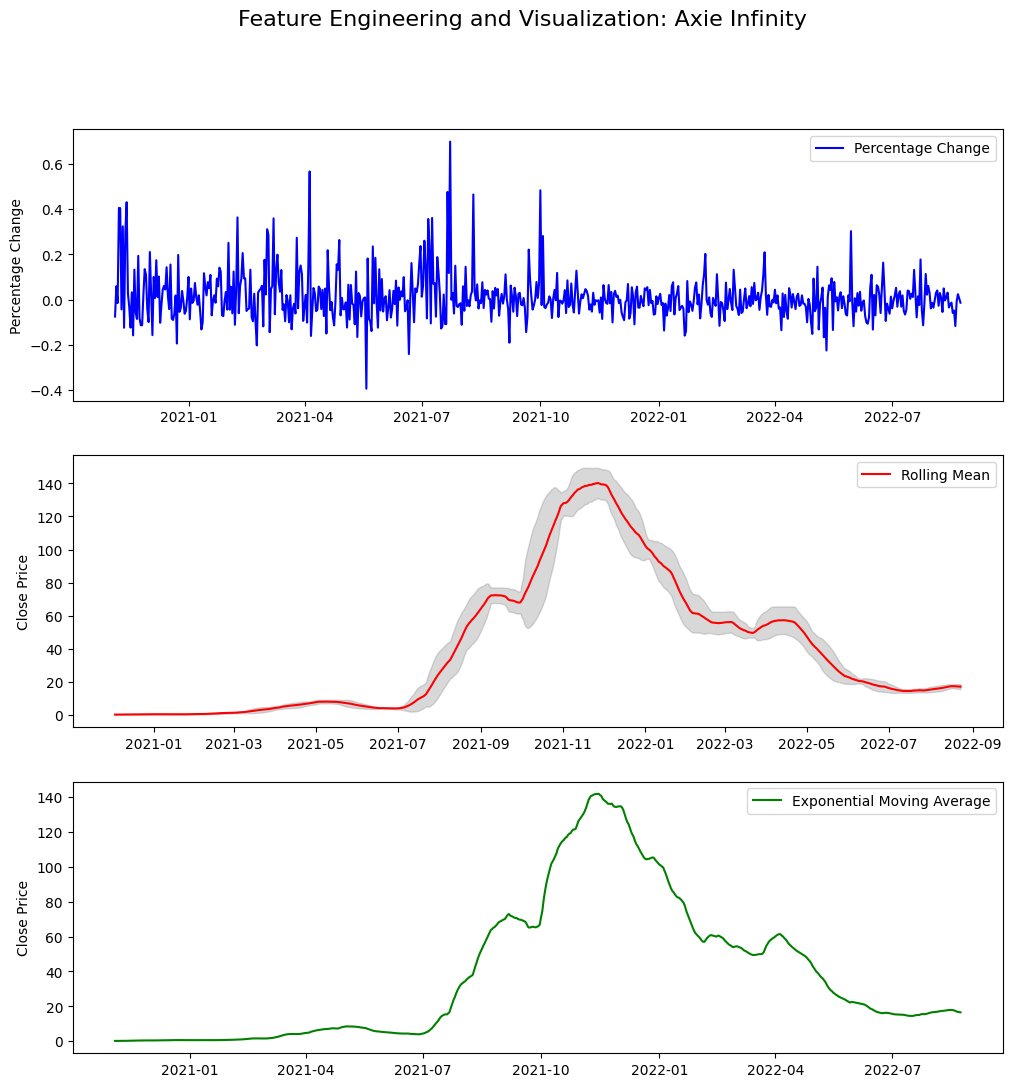

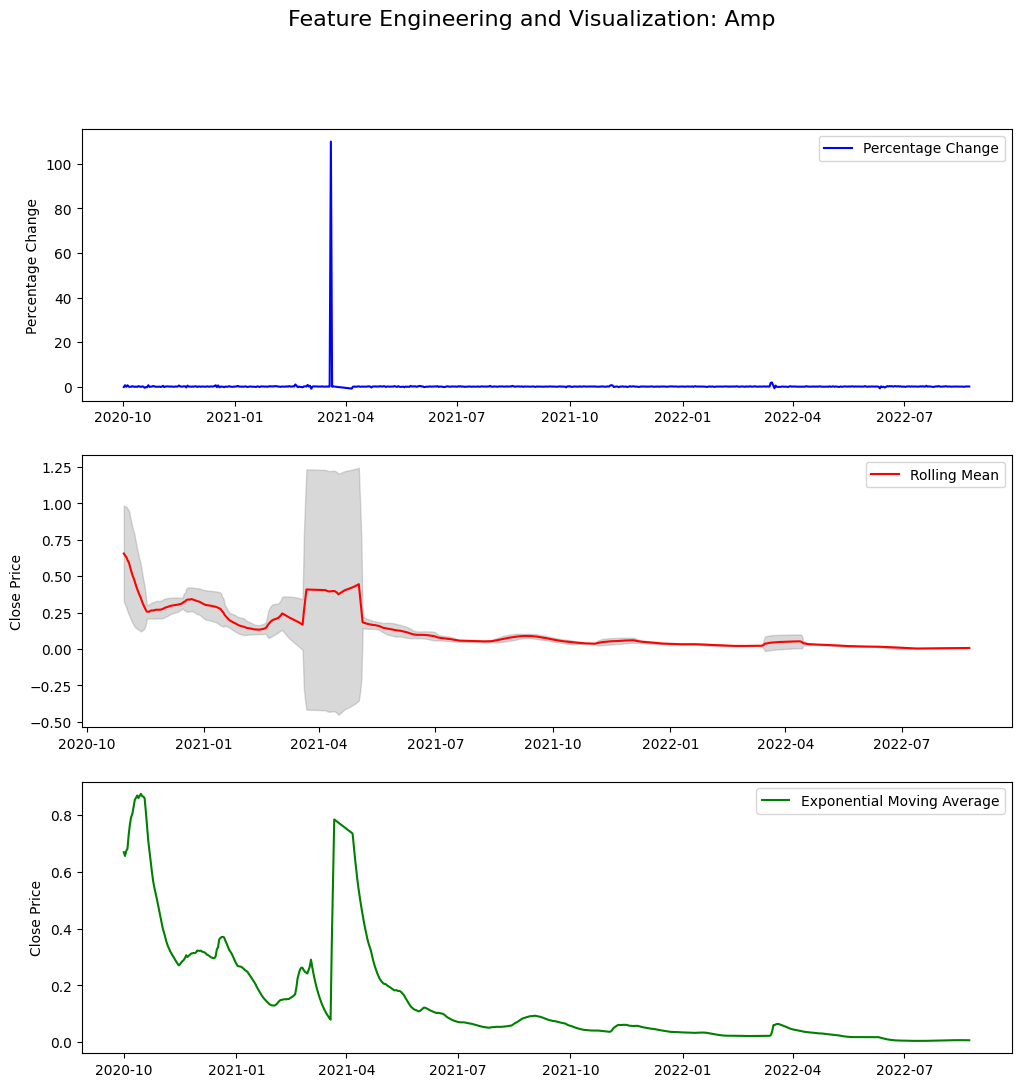

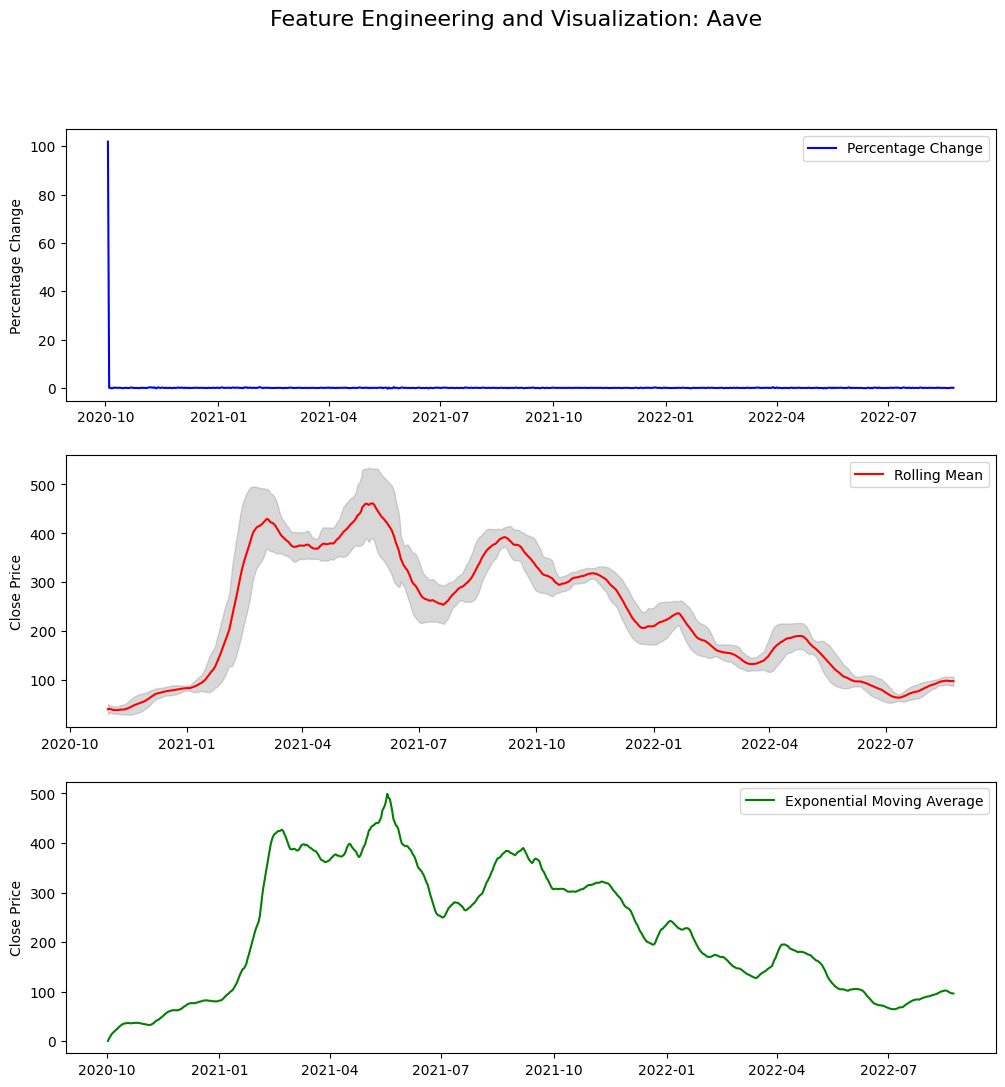

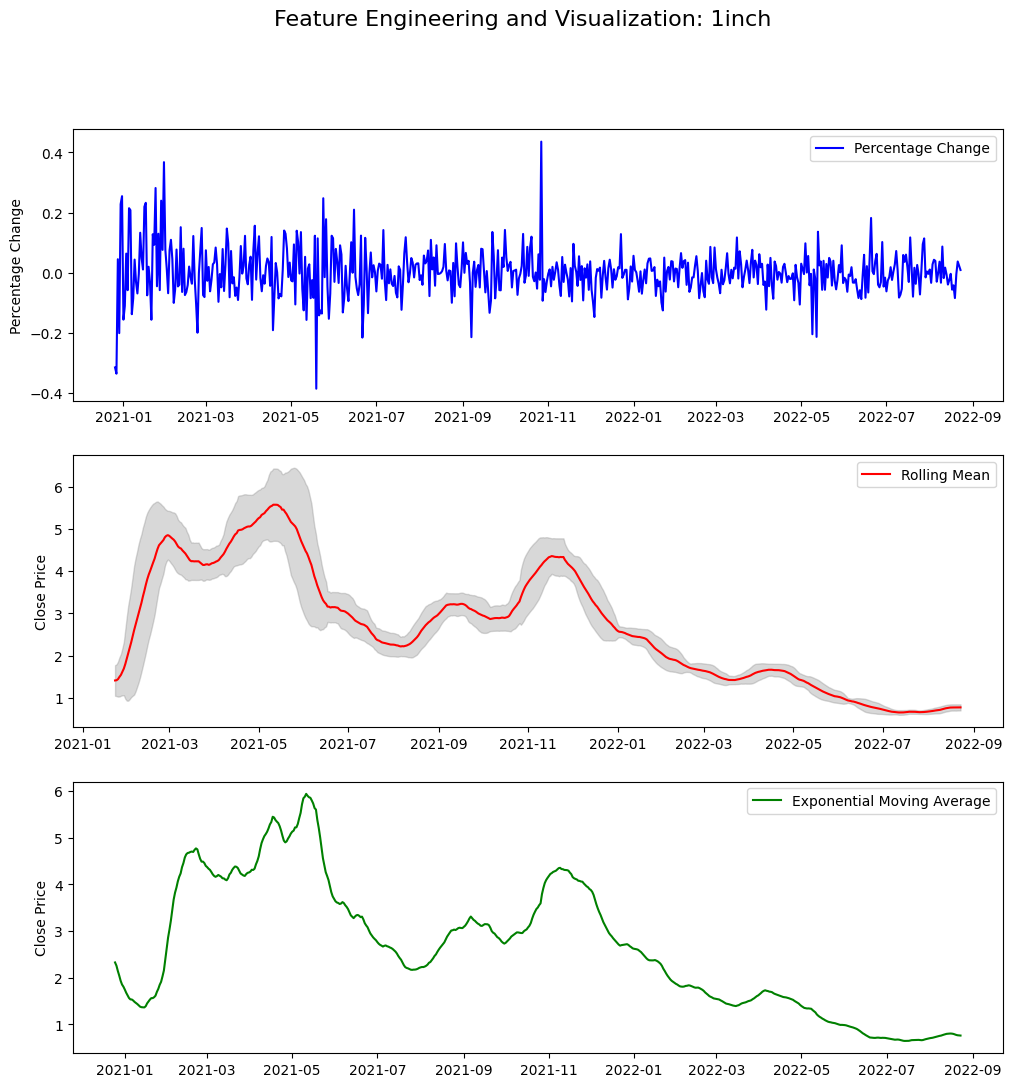

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
df1 = pd.read_csv('/content/Crypto/Chiliz.csv')
df2 = pd.read_csv('/content/Crypto/Bitcoin SV.csv')

df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Visualize the comparison of Close Prices
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df1.index, df1['Close'], label='Chiliz', color='blue')
ax.plot(df2.index, df2['Close'], label='Bitcoin SV', color='orange')
ax.set_ylabel('Close Price')
ax.legend()
plt.show()

# Function to perform feature engineering and plot features
def process_and_plot_crypto(file_path, label):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Normalize the close price
    df['Normalized'] = df['Close'] / df['Close'].iloc[0]

    # Calculate the percentage change
    df['Pct_Change'] = df['Normalized'].pct_change()

    # Calculate the rolling mean and standard deviation
    df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=30).std()

    # Calculate the exponential moving average
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Plot the features
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

    # Plot the percentage change
    axes[0].plot(df.index, df['Pct_Change'], label='Percentage Change', color='blue')
    axes[0].set_ylabel('Percentage Change')
    axes[0].legend()

    # Plot the rolling mean and standard deviation
    axes[1].plot(df.index, df['Rolling_Mean'], label='Rolling Mean', color='red')
    axes[1].fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], alpha=0.3, color='gray')
    axes[1].set_ylabel('Close Price')
    axes[1].legend()

    # Plot the exponential moving average
    axes[2].plot(df.index, df['EMA'], label='Exponential Moving Average', color='green')
    axes[2].set_ylabel('Close Price')
    axes[2].legend()

    plt.suptitle(f"Feature Engineering and Visualization: {label}", fontsize=16)
    plt.show()

# Load and process data for multiple cryptocurrencies
file_paths = [
    ('/content/Crypto/Chiliz.csv', 'Chiliz'),
    ('/content/Crypto/Dash.csv', 'Dash'),
    ('/content/Crypto/Celo.csv', 'Celo'),
    ('/content/Crypto/Curve DAO Token.csv', 'Curve DAO Token'),
    ('/content/Crypto/Bitcoin SV.csv', 'Bitcoin SV'),
    ('/content/Crypto/Basic Attention Token.csv', 'Basic Attention Token'),
    ('/content/Crypto/Axie Infinity.csv', 'Axie Infinity'),
    ('/content/Crypto/Amp.csv', 'Amp'),
    ('/content/Crypto/Aave.csv', 'Aave'),
    ('/content/Crypto/1inch.csv', '1inch')
]

for file_path, label in file_paths:
    process_and_plot_crypto(file_path, label)

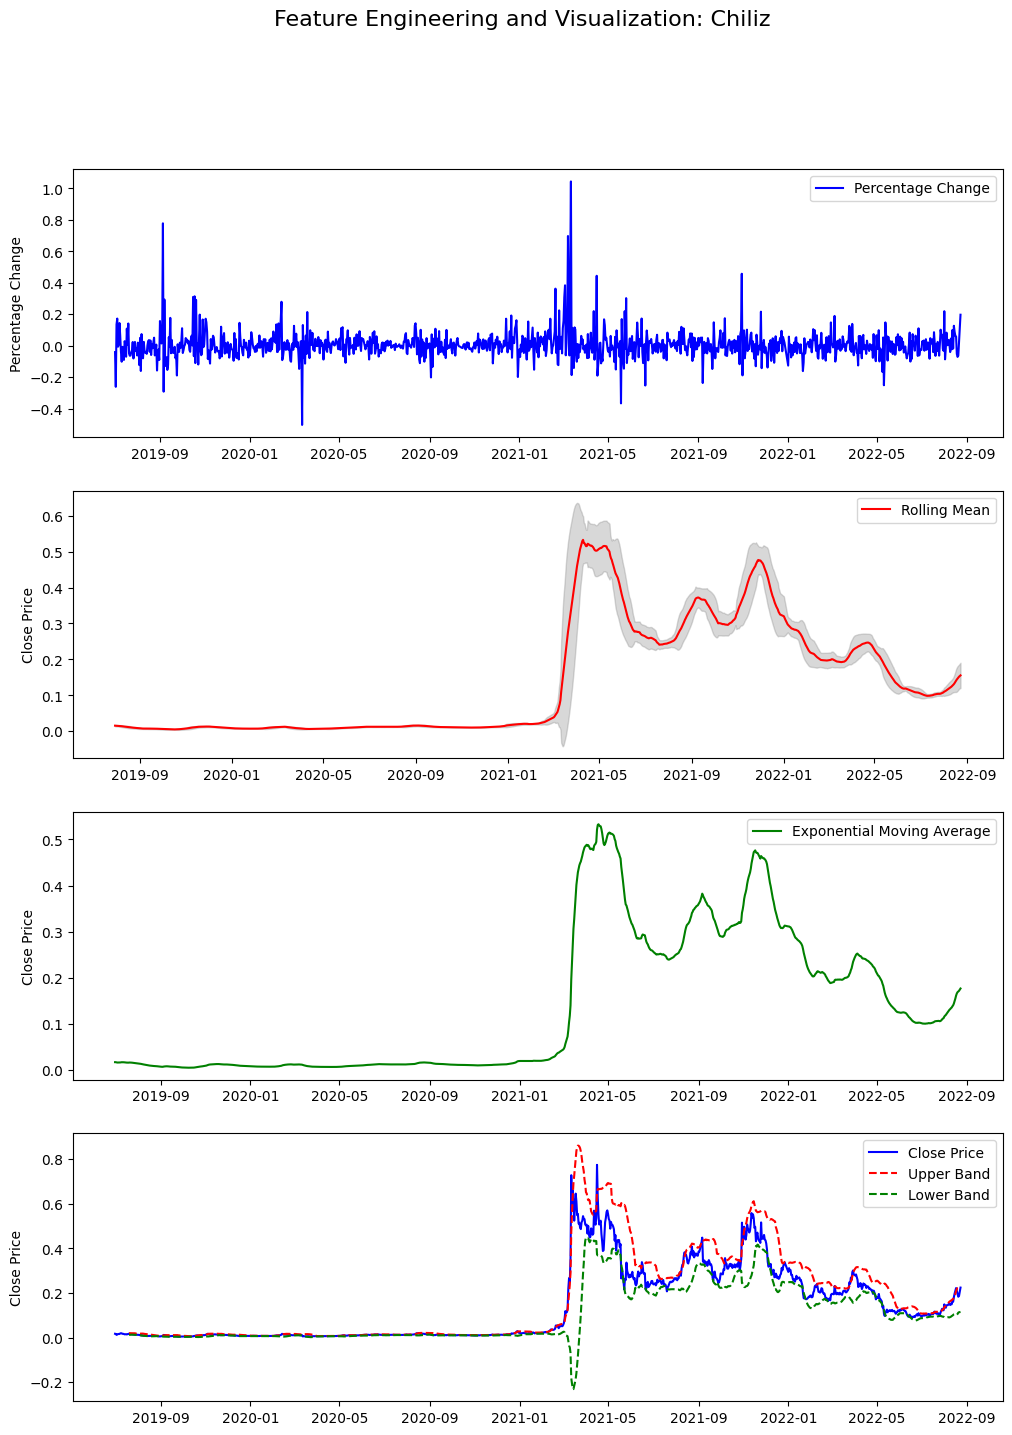

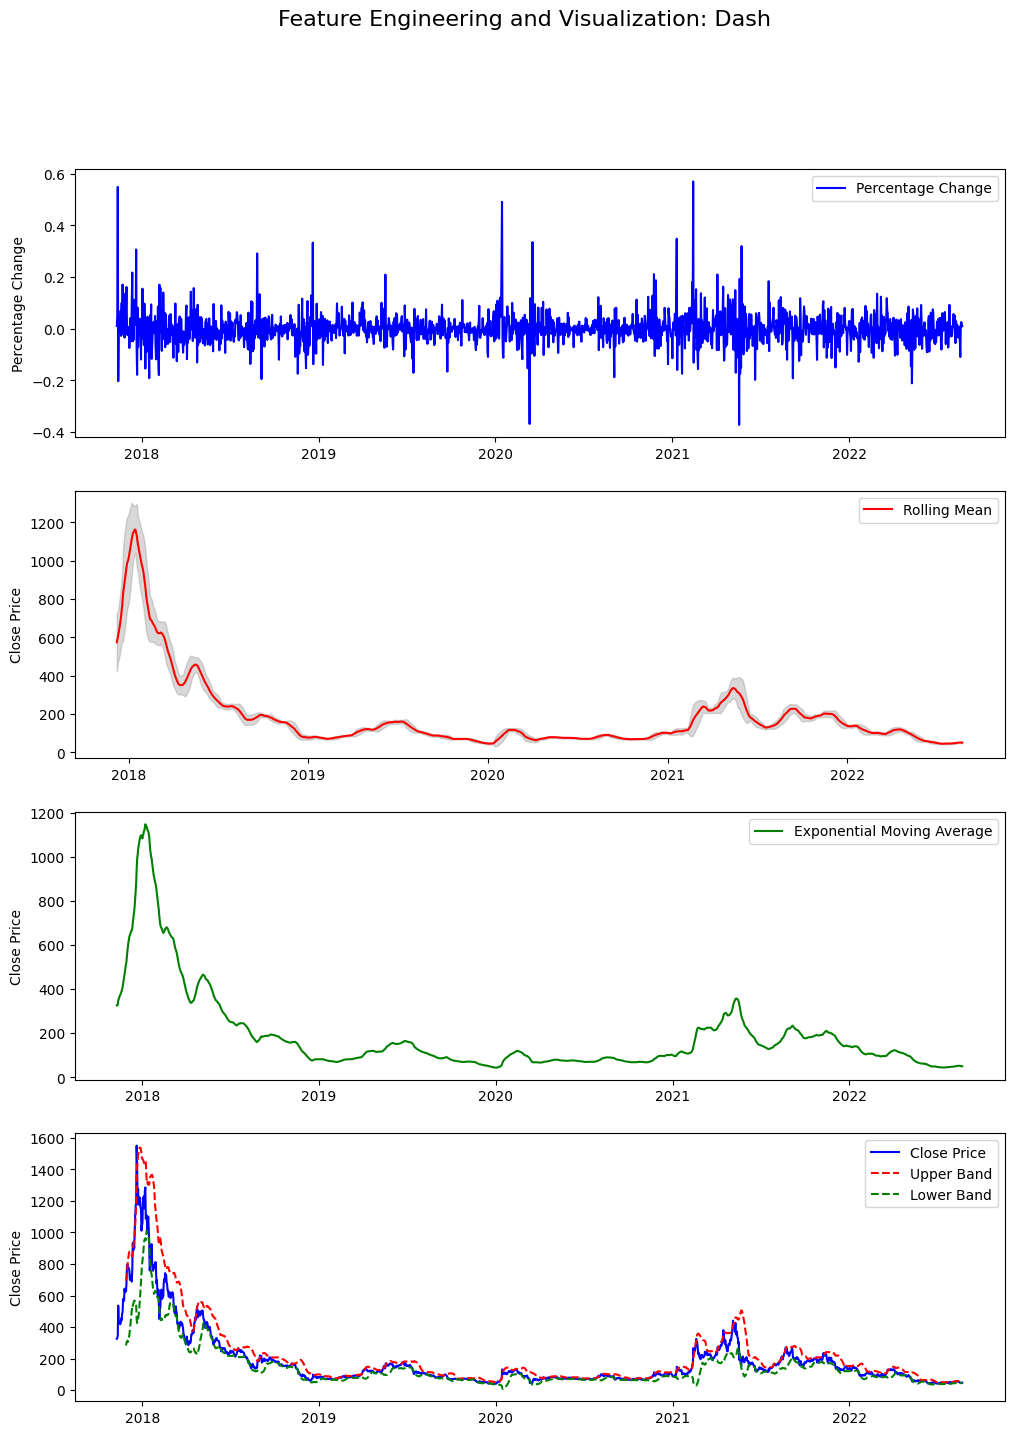

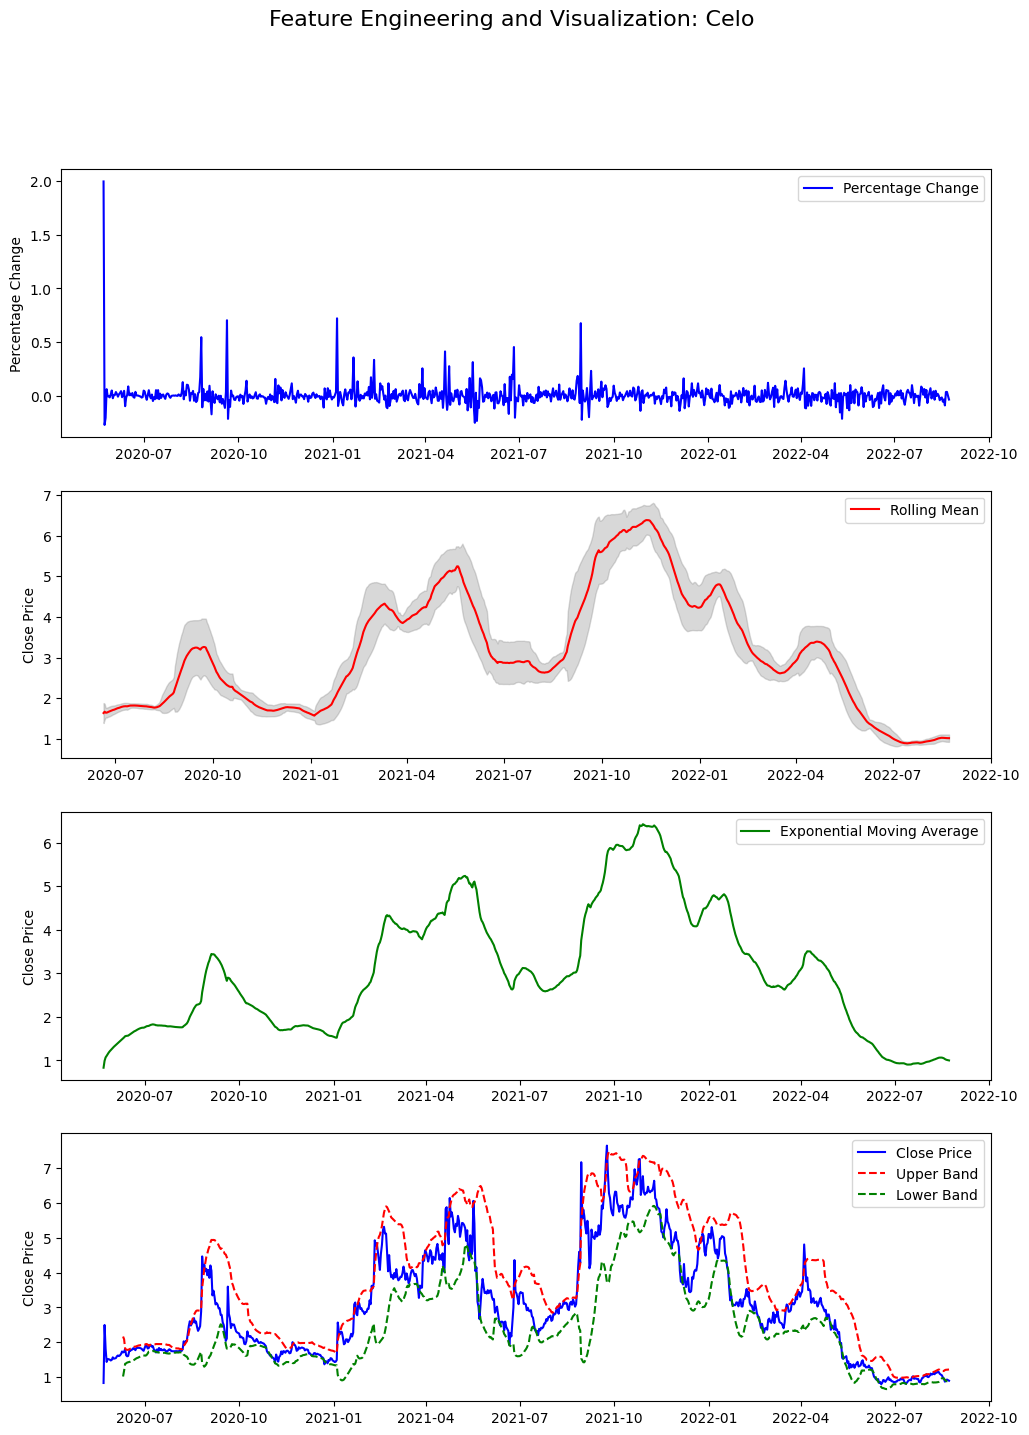

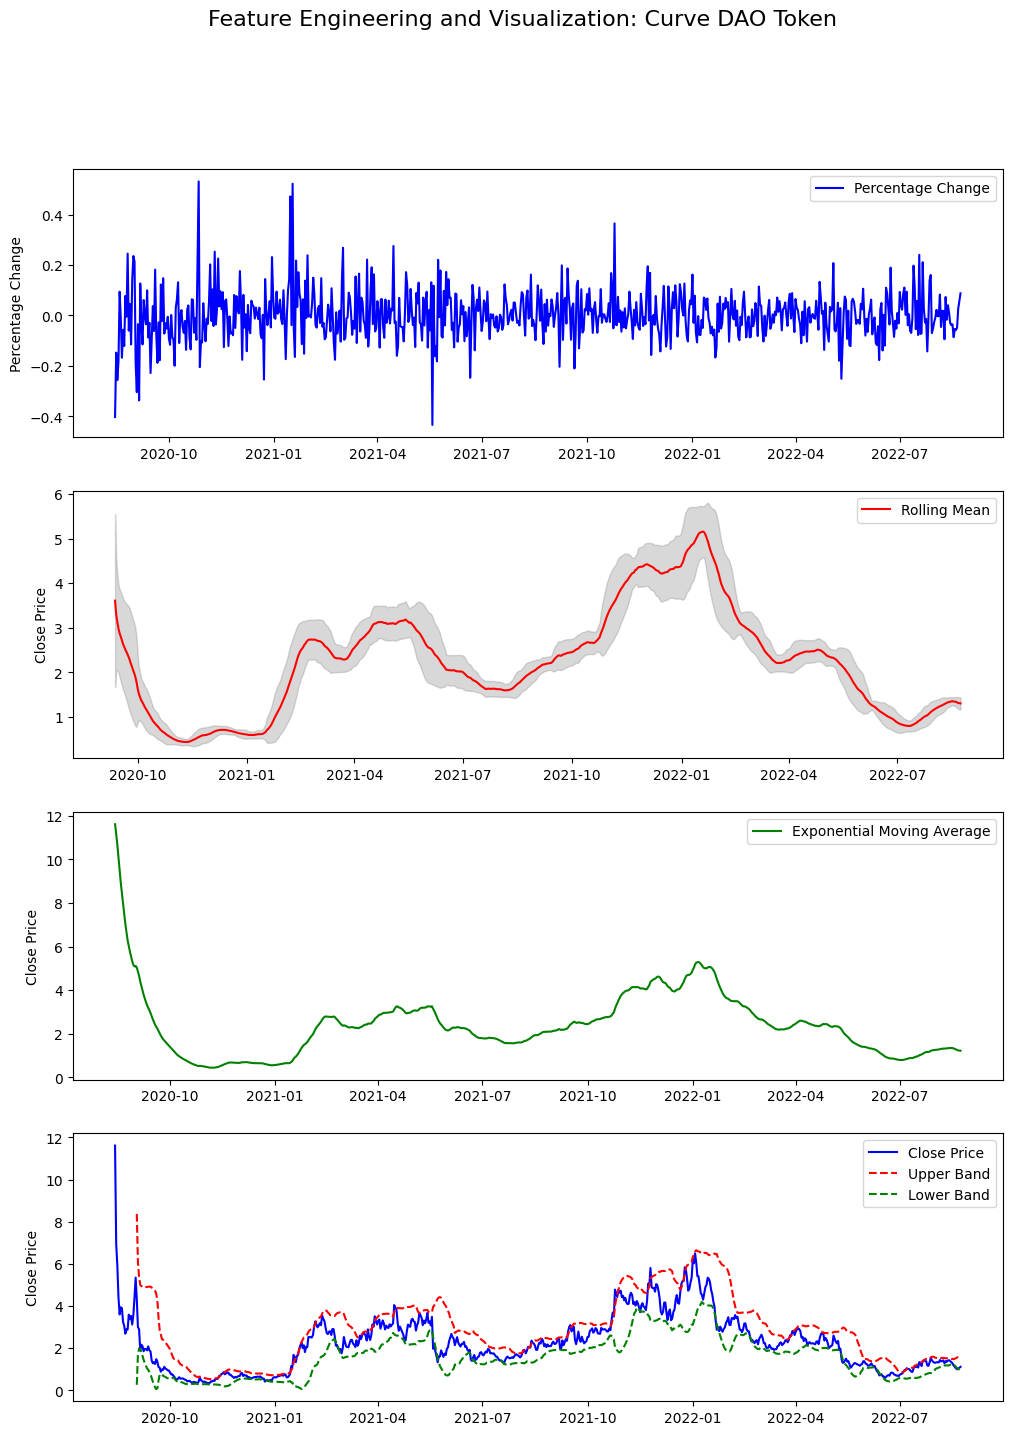

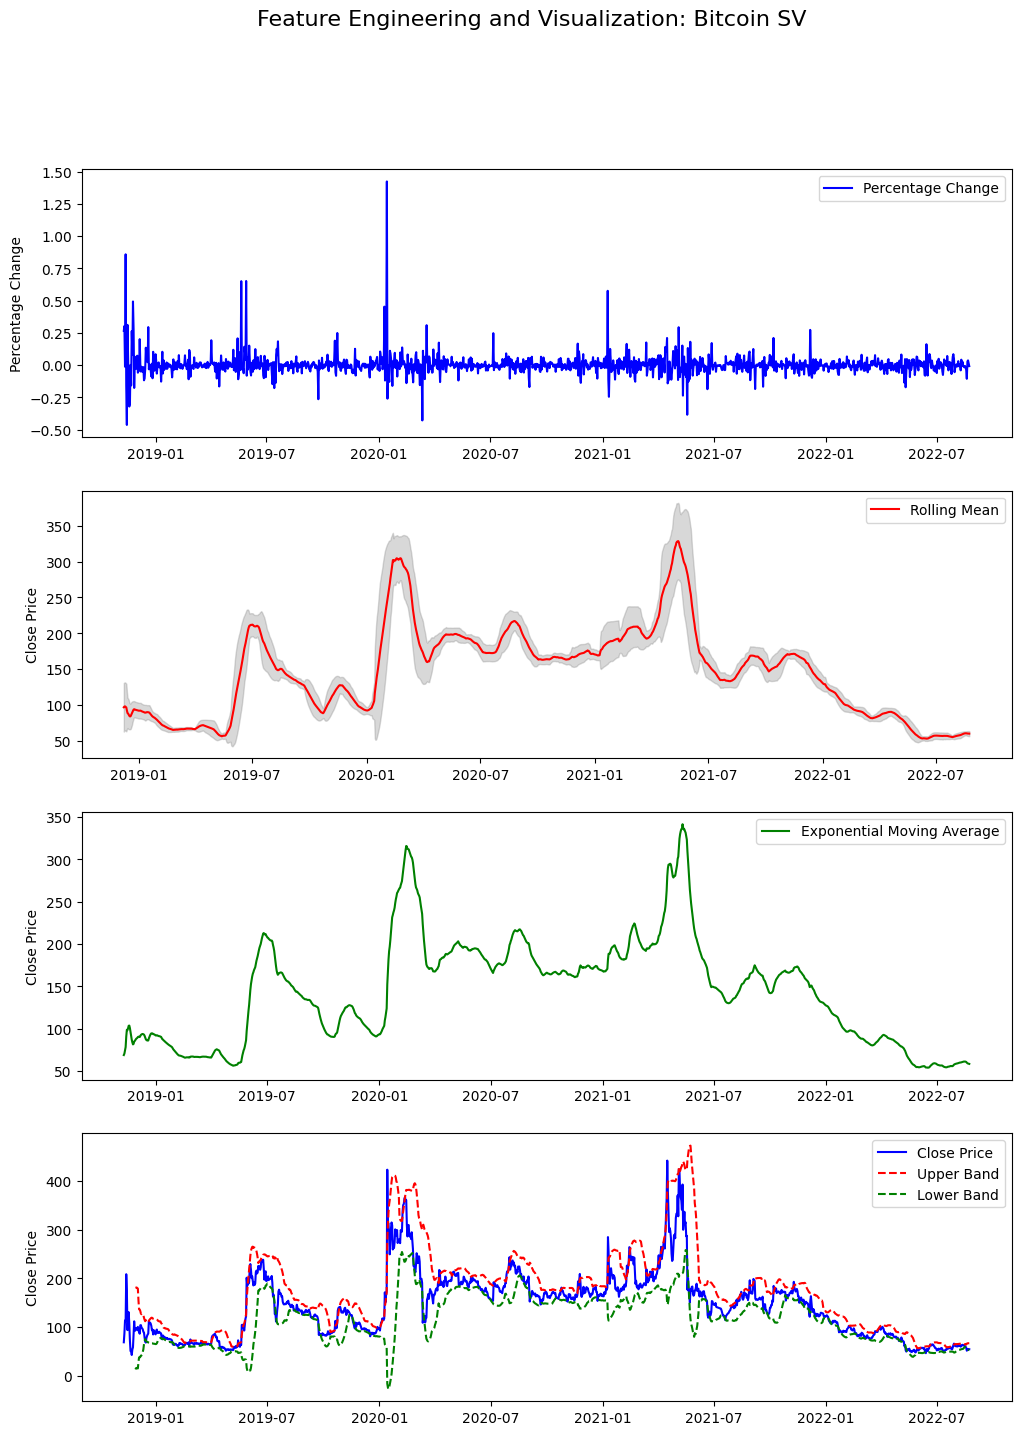

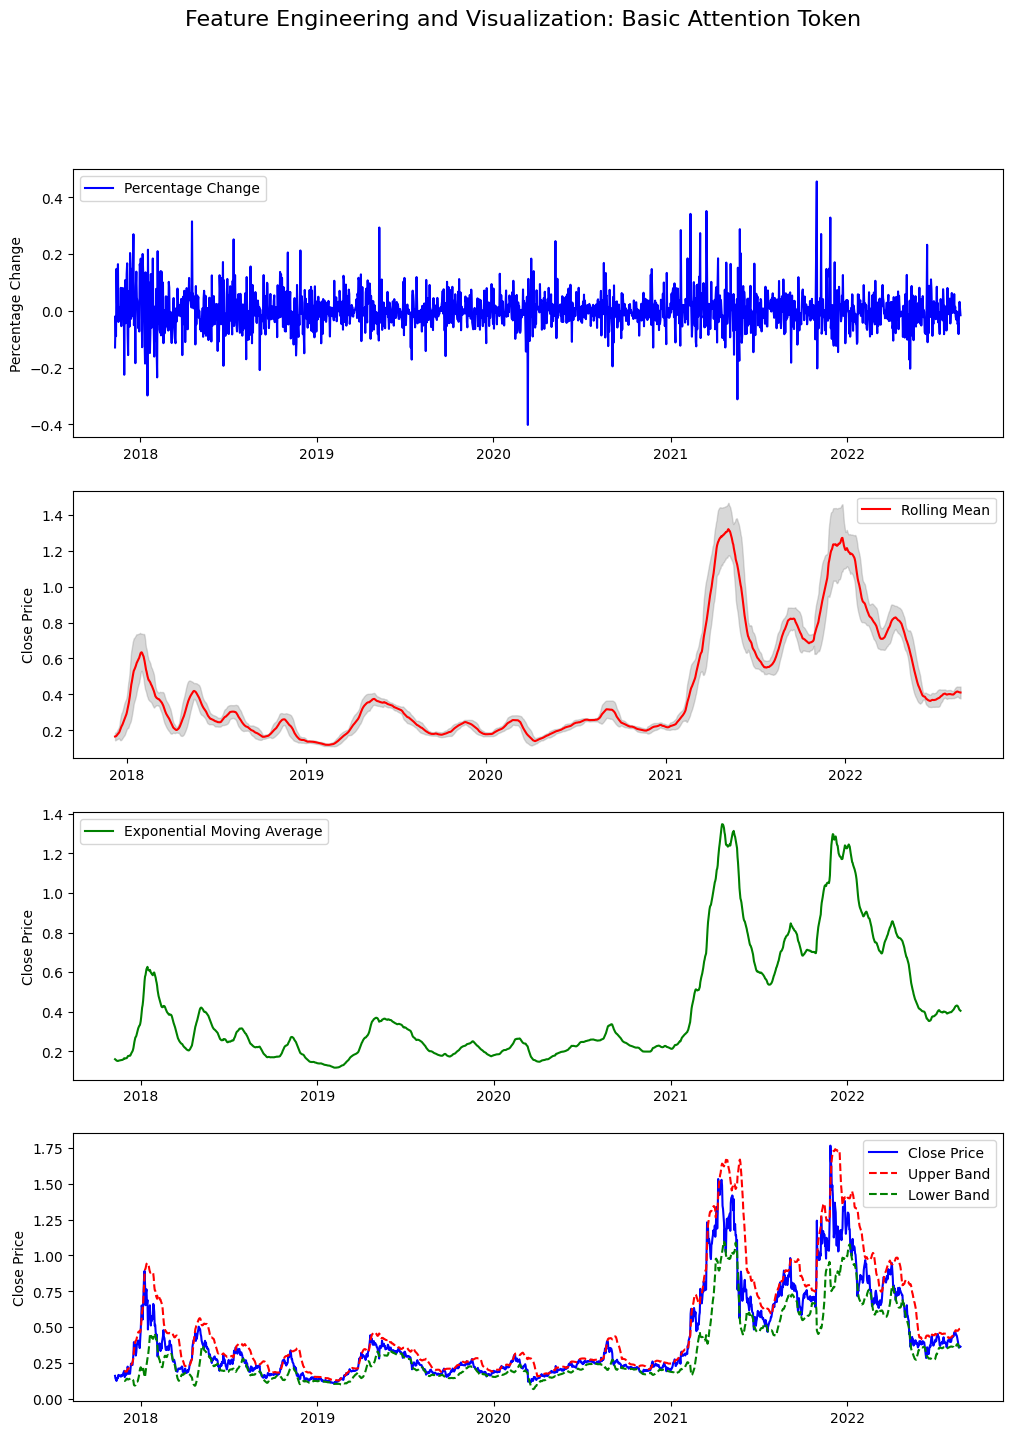

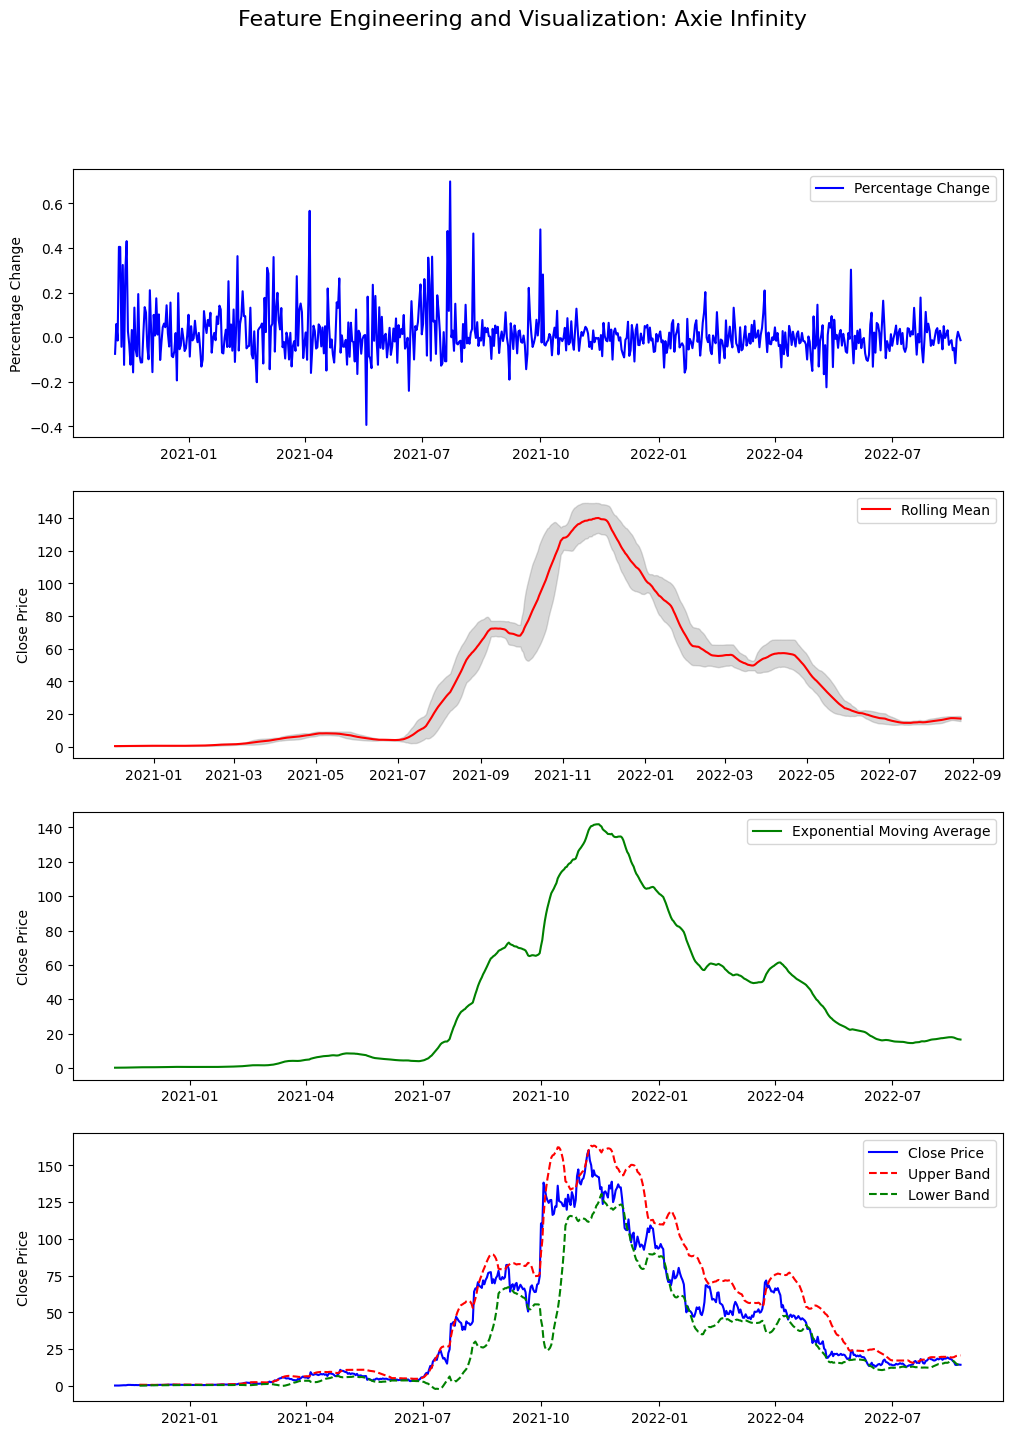

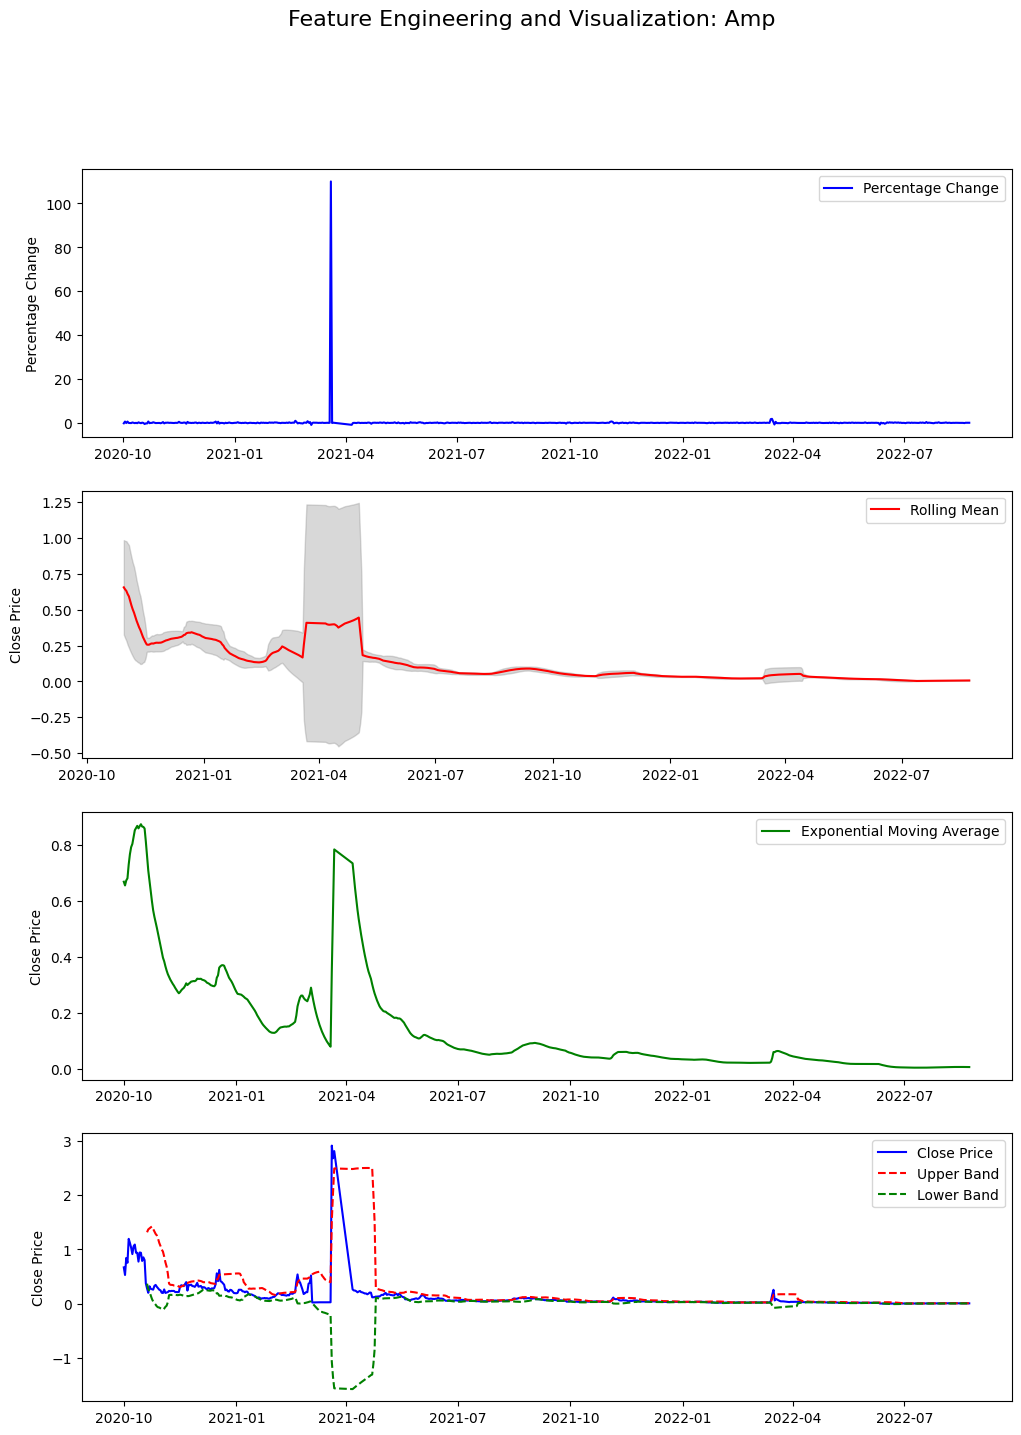

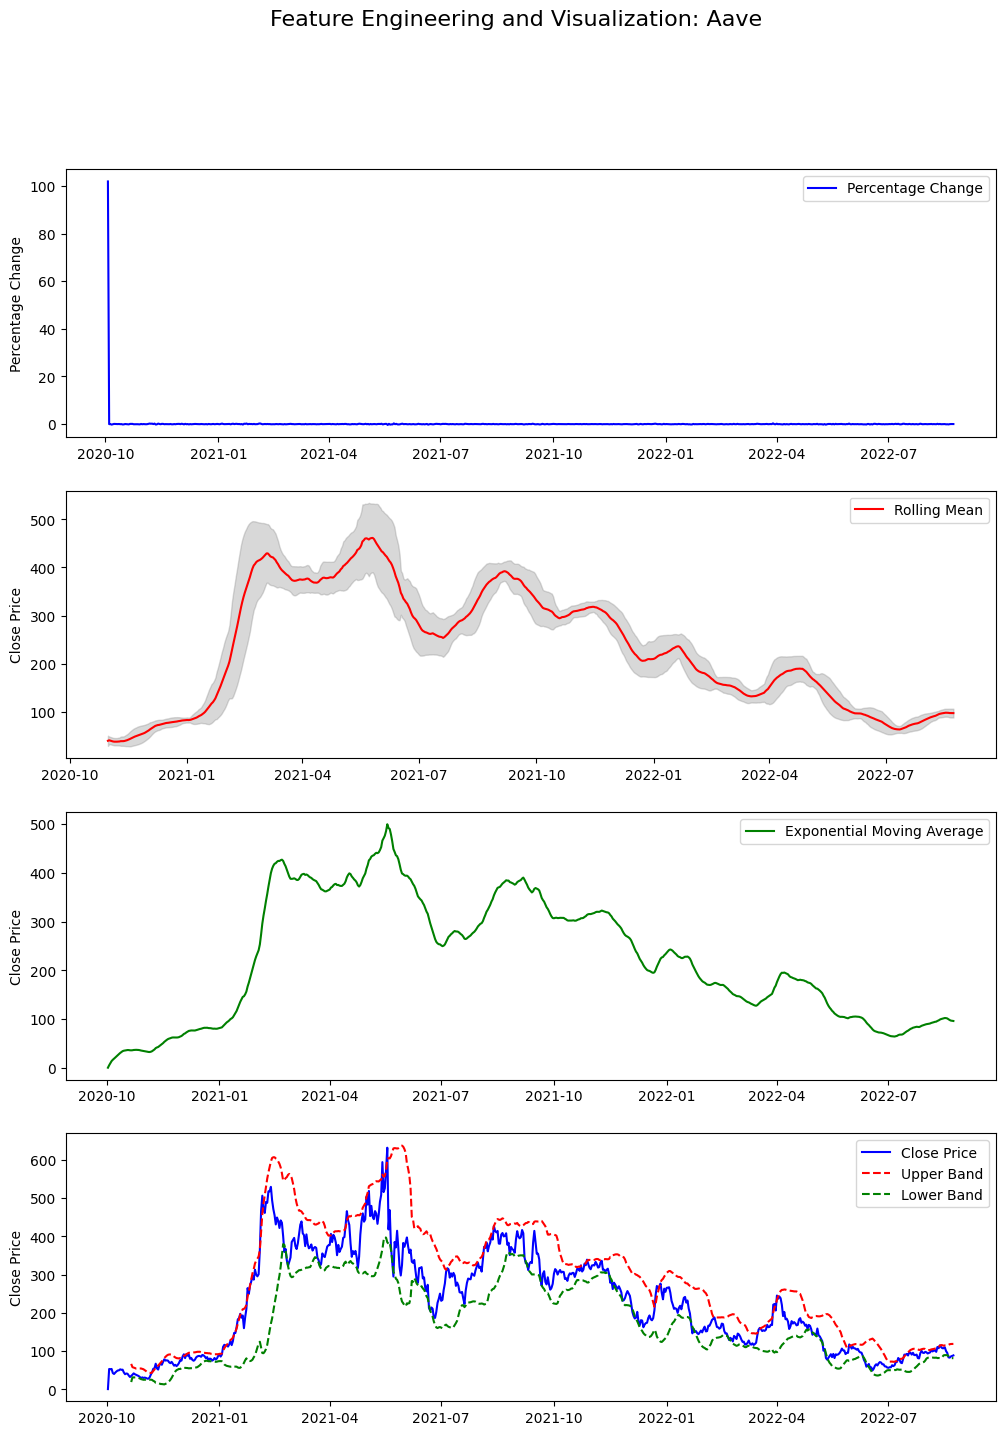

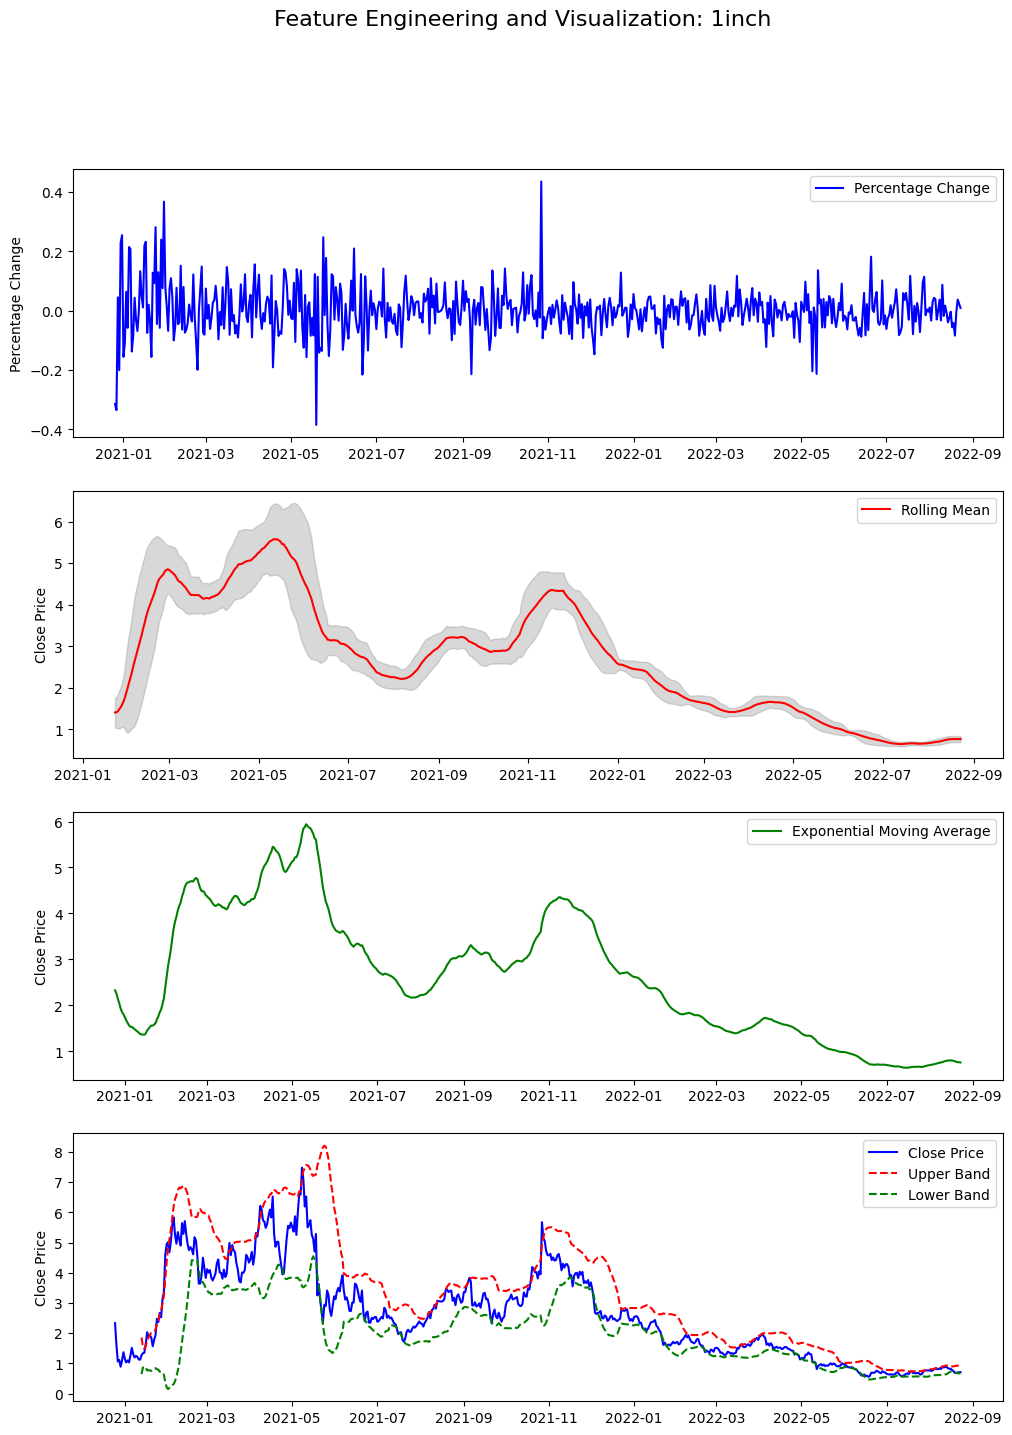

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Visualize the comparison of Close Prices
def visualize_comparison(df1, df2, label1, label2):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df1.index, df1['Close'], label=label1, color='blue')
    ax.plot(df2.index, df2['Close'], label=label2, color='orange')
    ax.set_ylabel('Close Price')
    ax.legend()
    plt.show()

# Function to perform feature engineering and plot features
def process_and_plot_crypto(file_path, label):
    try:
        # Load the data
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # Normalize the close price
        df['Normalized'] = df['Close'] / df['Close'].iloc[0]

        # Calculate the percentage change
        df['Pct_Change'] = df['Normalized'].pct_change()

        # Calculate the rolling mean and standard deviation
        df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
        df['Rolling_Std'] = df['Close'].rolling(window=30).std()

        # Calculate the exponential moving average
        df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()

        # Calculate the Bollinger Bands
        window_size = 20
        df['SMA'] = df['Close'].rolling(window=window_size).mean()
        df['Upper_Band'] = df['SMA'] + 2 * df['Close'].rolling(window=window_size).std()
        df['Lower_Band'] = df['SMA'] - 2 * df['Close'].rolling(window=window_size).std()

        # Plot the features
        fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

        # Plot the percentage change
        axes[0].plot(df.index, df['Pct_Change'], label='Percentage Change', color='blue')
        axes[0].set_ylabel('Percentage Change')
        axes[0].legend()

        # Plot the rolling mean and standard deviation
        axes[1].plot(df.index, df['Rolling_Mean'], label='Rolling Mean', color='red')
        axes[1].fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], alpha=0.3, color='gray')
        axes[1].set_ylabel('Close Price')
        axes[1].legend()

        # Plot the exponential moving average
        axes[2].plot(df.index, df['EMA'], label='Exponential Moving Average', color='green')
        axes[2].set_ylabel('Close Price')
        axes[2].legend()

        # Plot the Bollinger Bands
        axes[3].plot(df.index, df['Close'], label='Close Price', color='blue')
        axes[3].plot(df.index, df['Upper_Band'], label='Upper Band', color='red', linestyle='--')
        axes[3].plot(df.index, df['Lower_Band'], label='Lower Band', color='green', linestyle='--')
        axes[3].set_ylabel('Close Price')
        axes[3].legend()

        plt.suptitle(f"Feature Engineering and Visualization: {label}", fontsize=16)
        plt.show()
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while processing {label}: {e}")

# Folder containing the CSV files
csv_folder = '/content/Crypto'

# List of files and their labels
file_paths = [
    ('Chiliz.csv', 'Chiliz'),
    ('Dash.csv', 'Dash'),
    ('Celo.csv', 'Celo'),
    ('Curve DAO Token.csv', 'Curve DAO Token'),
    ('Bitcoin SV.csv', 'Bitcoin SV'),
    ('Basic Attention Token.csv', 'Basic Attention Token'),
    ('Axie Infinity.csv', 'Axie Infinity'),
    ('Amp.csv', 'Amp'),
    ('Aave.csv', 'Aave'),
    ('1inch.csv', '1inch')
]

# Process and plot data for multiple cryptocurrencies
for file, label in file_paths:
    file_path = os.path.join(csv_folder, file)  # Use os.path.join to construct the path
    process_and_plot_crypto(file_path, label)

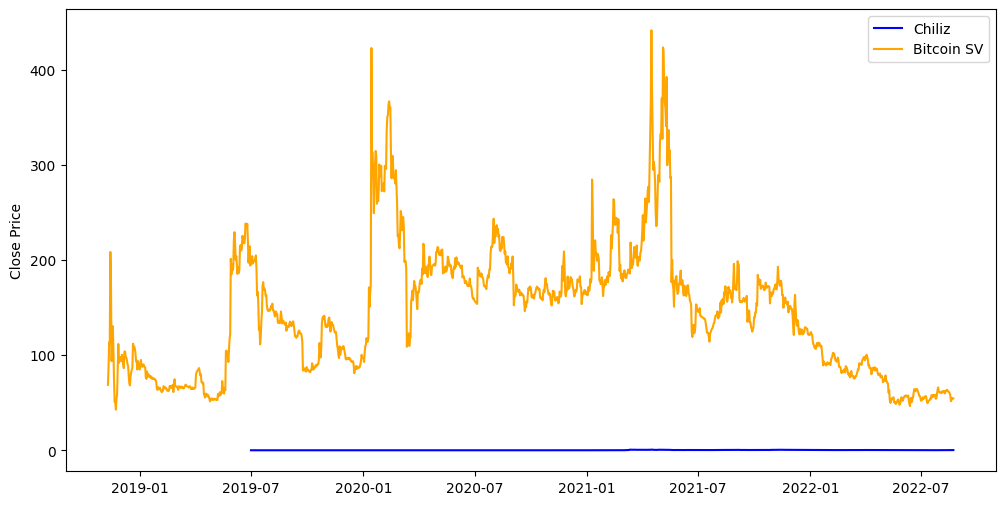

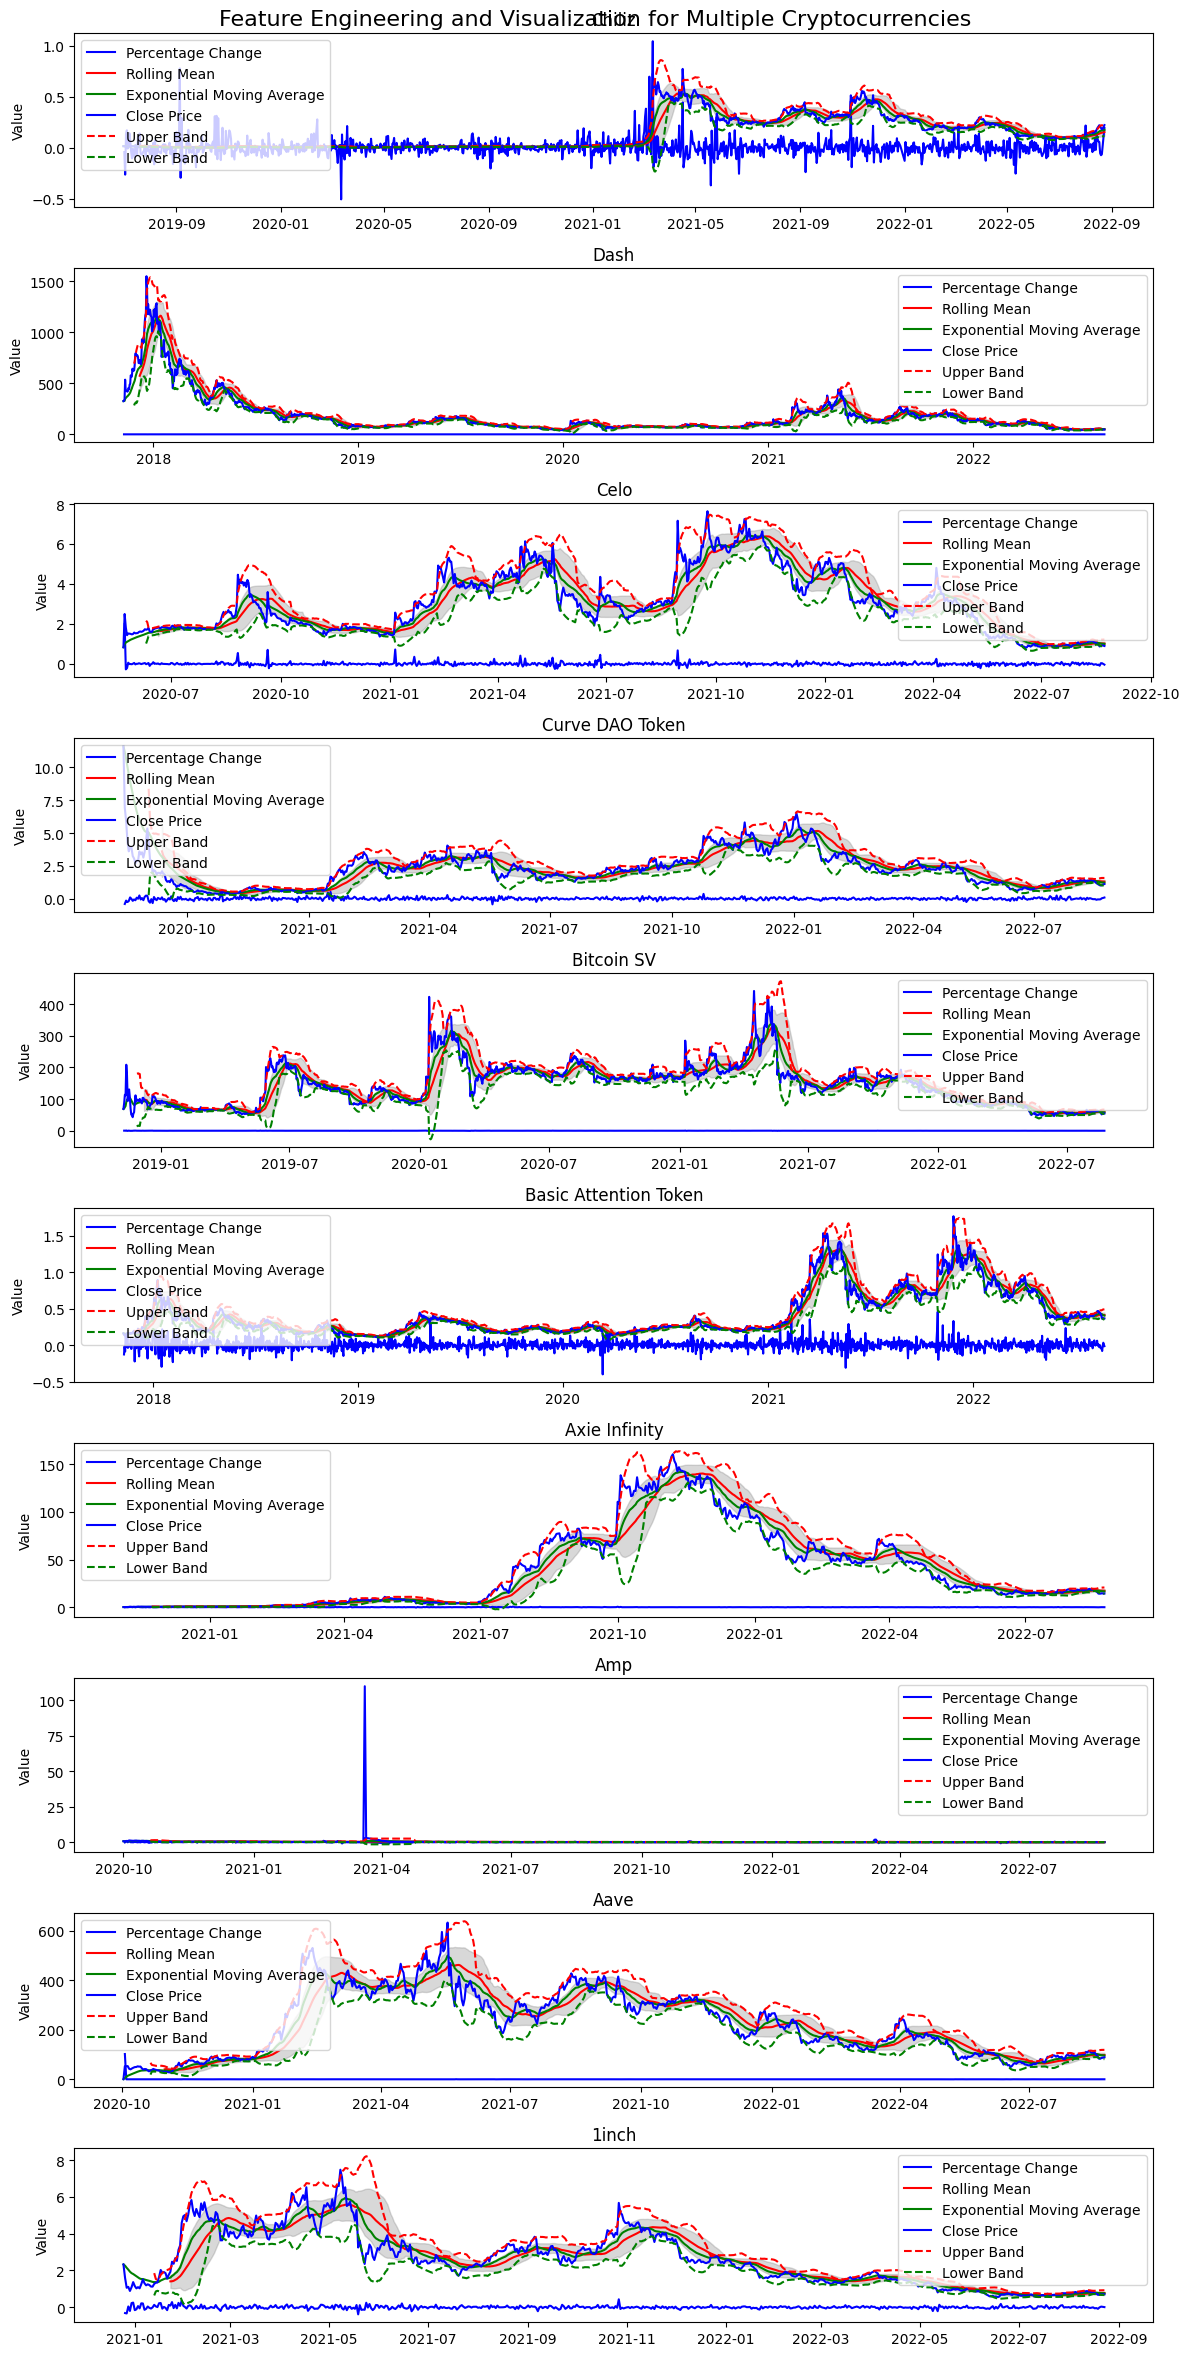

In [42]:
# Load the data for two cryptocurrencies
file_path1 = '/content/Crypto/Chiliz.csv'
file_path2 = '/content/Crypto/Bitcoin SV.csv'
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Preprocess the data
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Visualize the comparison of Close Prices
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df1.index, df1['Close'], label='Chiliz', color='blue')
ax.plot(df2.index, df2['Close'], label='Bitcoin SV', color='orange')
ax.set_ylabel('Close Price')
ax.legend()
plt.show()

# Function to perform feature engineering and plot features
def process_and_plot_crypto(file_path, label):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Normalize the close price
    df['Normalized'] = df['Close'] / df['Close'].iloc[0]

    # Calculate the percentage change
    df['Pct_Change'] = df['Normalized'].pct_change()

    # Calculate the rolling mean and standard deviation
    df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=30).std()

    # Calculate the exponential moving average
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Calculate the Bollinger Bands
    window_size = 20
    df['SMA'] = df['Close'].rolling(window=window_size).mean()
    df['Upper_Band'] = df['SMA'] + 2 * df['Close'].rolling(window=window_size).std()
    df['Lower_Band'] = df['SMA'] - 2 * df['Close'].rolling(window=window_size).std()

    # Plot the features
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

    # Plot the percentage change
    axes[0].plot(df.index, df['Pct_Change'], label='Percentage Change', color='blue')
    axes[0].set_ylabel('Percentage Change')
    axes[0].legend()

    # Plot the rolling mean and standard deviation
    axes[1].plot(df.index, df['Rolling_Mean'], label='Rolling Mean', color='red')
    axes[1].fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], alpha=0.3, color='gray')
    axes[1].set_ylabel('Close Price')
    axes[1].legend()

    # Plot the exponential moving average
    axes[2].plot(df.index, df['EMA'], label='Exponential Moving Average', color='green')
    axes[2].set_ylabel('Close Price')
    axes[2].legend()

    # Plot the Bollinger Bands
    axes[3].plot(df.index, df['Close'], label='Close Price', color='blue')
    axes[3].plot(df.index, df['Upper_Band'], label='Upper Band', color='red', linestyle='--')
    axes[3].plot(df.index, df['Lower_Band'], label='Lower Band', color='green', linestyle='--')
    axes[3].set_ylabel('Close Price')
    axes[3].legend()

    plt.suptitle(f"Feature Engineering and Visualization: {label}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Load and process data for multiple cryptocurrencies
file_paths = [
    ('/content/Crypto/Chiliz.csv', 'Chiliz'),
    ('/content/Crypto/Dash.csv', 'Dash'),
    ('/content/Crypto/Celo.csv', 'Celo'),
    ('/content/Crypto/Curve DAO Token.csv', 'Curve DAO Token'),
    ('/content/Crypto/Bitcoin SV.csv', 'Bitcoin SV'),
    ('/content/Crypto/Basic Attention Token.csv', 'Basic Attention Token'),
    ('/content/Crypto/Axie Infinity.csv', 'Axie Infinity'),
    ('/content/Crypto/Amp.csv', 'Amp'),
    ('/content/Crypto/Aave.csv', 'Aave'),
    ('/content/Crypto/1inch.csv', '1inch')
]

fig, axes = plt.subplots(nrows=len(file_paths), ncols=1, figsize=(12, 24))

for i, (file_path, label) in enumerate(file_paths):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Normalize the close price
    df['Normalized'] = df['Close'] / df['Close'].iloc[0]

    # Calculate the percentage change
    df['Pct_Change'] = df['Normalized'].pct_change()

    # Calculate the rolling mean and standard deviation
    df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=30).std()

    # Calculate the exponential moving average
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Calculate the Bollinger Bands
    window_size = 20
    df['SMA'] = df['Close'].rolling(window=window_size).mean()
    df['Upper_Band'] = df['SMA'] + 2 * df['Close'].rolling(window=window_size).std()
    df['Lower_Band'] = df['SMA'] - 2 * df['Close'].rolling(window=window_size).std()

    # Plot the features
    axes[i].plot(df.index, df['Pct_Change'], label='Percentage Change', color='blue')
    axes[i].plot(df.index, df['Rolling_Mean'], label='Rolling Mean', color='red')
    axes[i].fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], alpha=0.3, color='gray')
    axes[i].plot(df.index, df['EMA'], label='Exponential Moving Average', color='green')
    axes[i].plot(df.index, df['Close'], label='Close Price', color='blue')
    axes[i].plot(df.index, df['Upper_Band'], label='Upper Band', color='red', linestyle='--')
    axes[i].plot(df.index, df['Lower_Band'], label='Lower Band', color='green', linestyle='--')
    axes[i].set_ylabel('Value')
    axes[i].set_title(label)
    axes[i].legend()

plt.suptitle('Feature Engineering and Visualization for Multiple Cryptocurrencies', fontsize=16)
plt.tight_layout()
plt.show()


Correlation Matrix:
                  Open      High       Low     Close    Volume  Normalized  \
Open          1.000000  0.989529  0.989540  0.985179  0.377081    0.985179   
High          0.989529  1.000000  0.985280  0.992987  0.460651    0.992987   
Low           0.989540  0.985280  1.000000  0.992910  0.376254    0.992910   
Close         0.985179  0.992987  0.992910  1.000000  0.425567    1.000000   
Volume        0.377081  0.460651  0.376254  0.425567  1.000000    0.425567   
Normalized    0.985179  0.992987  0.992910  1.000000  0.425567    1.000000   
Pct_Change   -0.046091  0.045360  0.041918  0.103559  0.253673    0.103559   
Rolling_Mean  0.889656  0.882535  0.878648  0.878620  0.245282    0.878620   
Rolling_Std   0.700150  0.707515  0.678828  0.697003  0.239744    0.697003   
EMA           0.952973  0.946767  0.941870  0.942650  0.308297    0.942650   
SMA           0.927198  0.920089  0.914630  0.915476  0.283907    0.915476   
Upper_Band    0.918118  0.916373  0.901012  

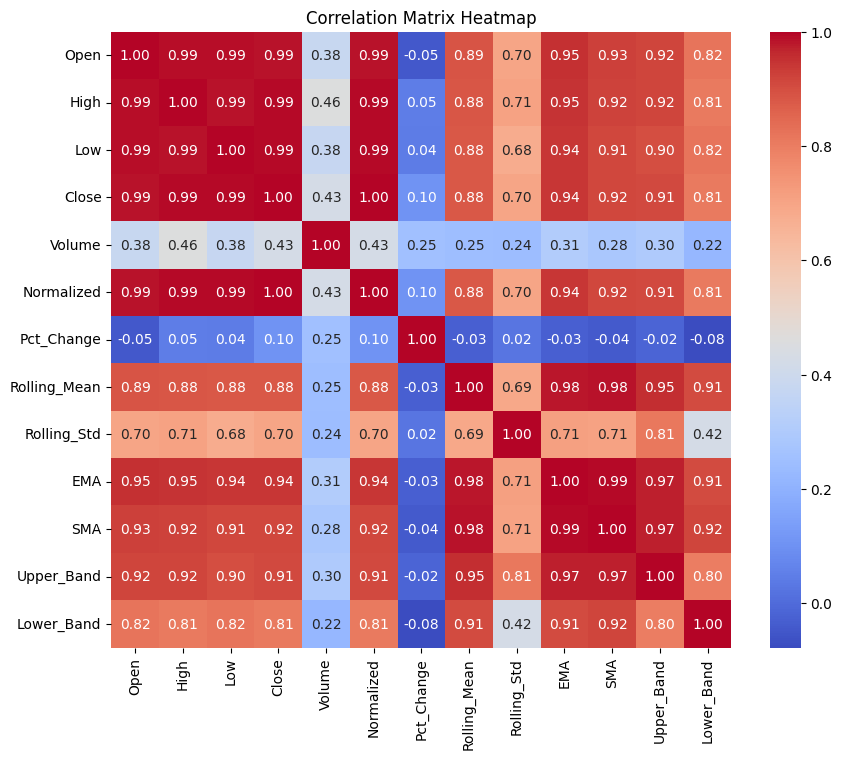

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your dataset)
# df = pd.read_csv('your_dataset.csv')

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 606 entries, 2020-12-25 to 2022-08-23
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          606 non-null    float64
 1   High          606 non-null    float64
 2   Low           606 non-null    float64
 3   Close         606 non-null    float64
 4   Volume        606 non-null    float64
 5   Currency      606 non-null    object 
 6   Normalized    606 non-null    float64
 7   Pct_Change    605 non-null    float64
 8   Rolling_Mean  577 non-null    float64
 9   Rolling_Std   577 non-null    float64
 10  EMA           606 non-null    float64
 11  SMA           587 non-null    float64
 12  Upper_Band    587 non-null    float64
 13  Lower_Band    587 non-null    float64
dtypes: float64(13), object(1)
memory usage: 71.0+ KB


In [45]:
def ml_pipeline(df):
    # Split data into features and target
    X = df.drop(['Close', 'Currency'], axis=1)  # Remove 'Date' from the features
    y = df['Close']

    # Select top 5 features using SelectKBest
    k_best = SelectKBest(f_regression, k=5)
    X_best = k_best.fit_transform(X, y)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform machine learning methods
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100),
        'Support Vector Regression': SVR(),
        'Multi-Layer Perceptron': MLPRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()
    }
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"{name}: RMSE = {rmse:.2f}")

In [47]:

# Define the ML pipeline
def ml_pipeline(df):
    # Split data into features and target
    X = df.drop(['Close', 'Currency'], axis=1)  # Remove 'Close' and 'Currency' from the features
    y = df['Close']

    # Select top 5 features using SelectKBest
    k_best = SelectKBest(f_regression, k=5)
    X_best = k_best.fit_transform(X, y)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform machine learning methods
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100),
        'Support Vector Regression': SVR(),
        'Multi-Layer Perceptron': MLPRegressor(max_iter=500),
        'Gradient Boosting': GradientBoostingRegressor()
    }

    print(f"Results for dataset: {df['Currency'].iloc[0]}")
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"{name}: RMSE = {rmse:.2f}")
    print("\n")

# Example: Define processed_dataframes
# This should be a list of preprocessed DataFrames, one for each currency
processed_dataframes = [
    pd.DataFrame({
        'Feature1': np.random.rand(100),
        'Feature2': np.random.rand(100),
        'Feature3': np.random.rand(100),
        'Feature4': np.random.rand(100),
        'Feature5': np.random.rand(100),
        'Close': np.random.rand(100) * 100,
        'Currency': ['USD'] * 100
    }),
    pd.DataFrame({
        'Feature1': np.random.rand(100),
        'Feature2': np.random.rand(100),
        'Feature3': np.random.rand(100),
        'Feature4': np.random.rand(100),
        'Feature5': np.random.rand(100),
        'Close': np.random.rand(100) * 100,
        'Currency': ['EUR'] * 100
    })
]

# Apply the ML pipeline to each processed DataFrame
for df in processed_dataframes:
    ml_pipeline(df)

Results for dataset: USD
Linear Regression: RMSE = 34.32
Random Forest: RMSE = 34.67
Support Vector Regression: RMSE = 30.76
Multi-Layer Perceptron: RMSE = 33.64
Gradient Boosting: RMSE = 33.85


Results for dataset: EUR
Linear Regression: RMSE = 30.70
Random Forest: RMSE = 30.67
Support Vector Regression: RMSE = 29.42
Multi-Layer Perceptron: RMSE = 33.65
Gradient Boosting: RMSE = 35.38




Feature Engineering for USD
Feature Engineering for EUR
Visualization for USD


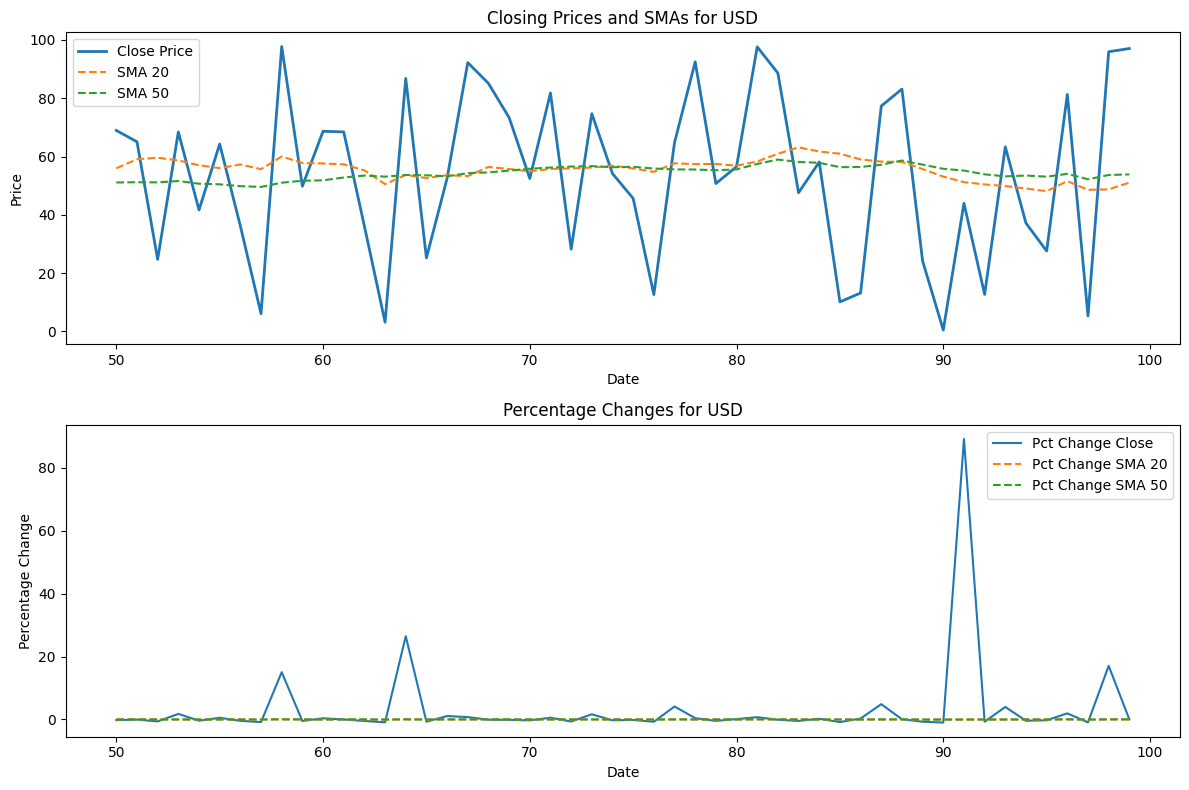

Visualization for EUR


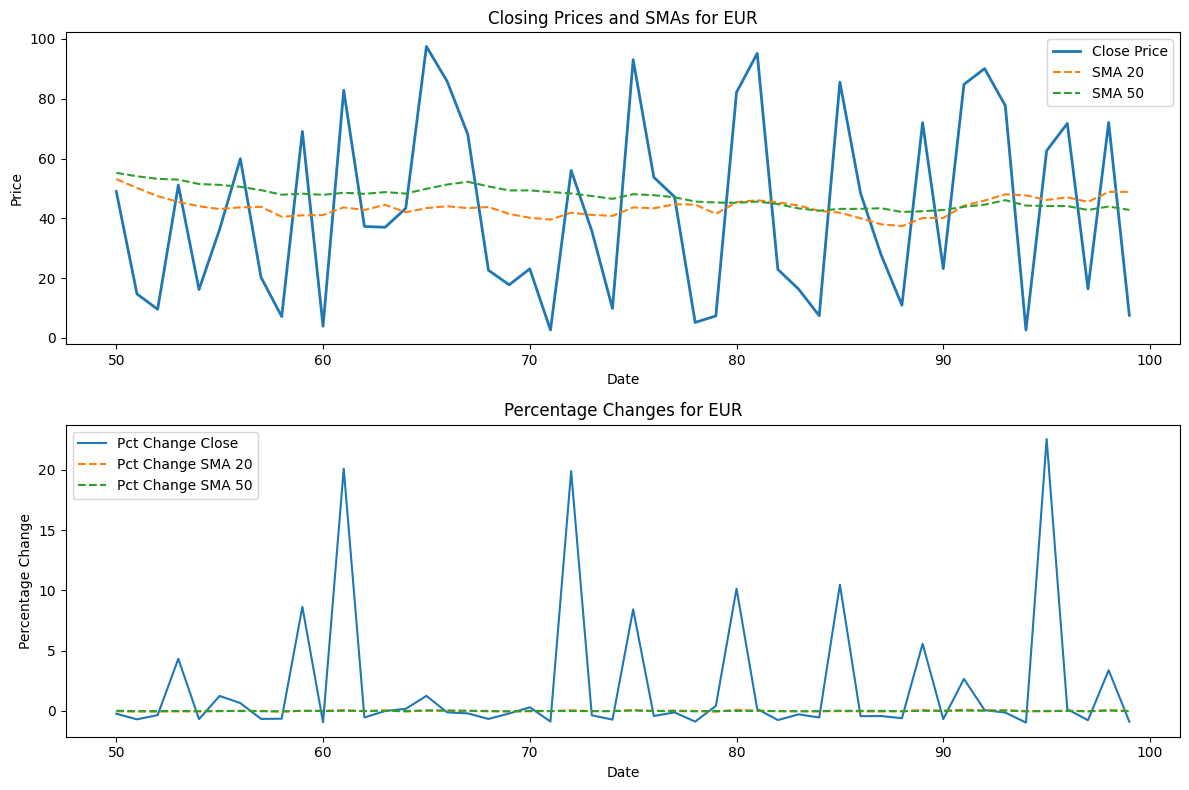

In [48]:
def feature_engineering(df):
    # Create rolling averages
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    df['Pct_Change'] = df['Close'].pct_change()
    df['Pct_Change_SMA_20'] = df['SMA_20'].pct_change()
    df['Pct_Change_SMA_50'] = df['SMA_50'].pct_change()

    df.dropna(inplace=True)

    return df

currency_data = {}

for df in processed_dataframes:
    currency = df['Currency'].iloc[0]
    print("Feature Engineering for", currency)
    df_fe = feature_engineering(df)
    currency_data[currency] = df_fe

for currency, df_fe in currency_data.items():
    print("Visualization for", currency)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot closing prices and SMAs
    axes[0].plot(df_fe.index, df_fe['Close'], label='Close Price', linewidth=2)
    axes[0].plot(df_fe.index, df_fe['SMA_20'], label='SMA 20', linestyle='--')
    axes[0].plot(df_fe.index, df_fe['SMA_50'], label='SMA 50', linestyle='--')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Price')
    axes[0].set_title(f'Closing Prices and SMAs for {currency}')
    axes[0].legend()

    # Plot percentage changes
    axes[1].plot(df_fe.index, df_fe['Pct_Change'], label='Pct Change Close', linestyle='-')
    axes[1].plot(df_fe.index, df_fe['Pct_Change_SMA_20'], label='Pct Change SMA 20', linestyle='--')
    axes[1].plot(df_fe.index, df_fe['Pct_Change_SMA_50'], label='Pct Change SMA 50', linestyle='--')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Percentage Change')
    axes[1].set_title(f'Percentage Changes for {currency}')
    axes[1].legend()

    plt.tight_layout()
    plt.show()